<a href="https://colab.research.google.com/github/MukeshMishraReloaded/projects/blob/main/Aerofit_treadmill.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**AEROFIT TREADMILL DATASET**

**About Aerofit**
Aerofit is a leading brand in the field of fitness equipment. Aerofit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of people.

**Business Problem**
The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

**Objective**

•	Create descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts.

•	For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.

**GOOGLE COLAB LINK:**

https://colab.research.google.com/drive/1nBSqVKwzjbMf9wzeYxrZgGlQXp9vwCpM#scrollTo=QPW7OkSX-_qf


In [ ]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np
from scipy.stats import chisquare #statistical test
from scipy.stats import chi2
from scipy.stats import chi2_contingency

In [ ]:
!wget  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749 -O aerofit_treadmill.csv
df_aerofit=pd.read_csv("aerofit_treadmill.csv")

--2023-10-01 10:24:25--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 99.84.178.132, 99.84.178.172, 99.84.178.93, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|99.84.178.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7279 (7.1K) [text/plain]
Saving to: ‘aerofit_treadmill.csv’

aerofit_treadmill.c 100%[===================>]   7.11K  --.-KB/s    in 0s      

2023-10-01 10:24:25 (1.99 GB/s) - ‘aerofit_treadmill.csv’ saved [7279/7279]



In [ ]:
#Prelim. Analysis
df_aerofit.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [ ]:
df_aerofit.shape

(180, 9)

**Shape of the dataframe:** Total number of records is 180 with 9 columns

In [ ]:
#Statistical information about numeric values
df_aerofit.describe()
#[df_aerofit['Product'] == 'KP281']

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [ ]:
[df_aerofit['Product'] == 'KP281']

[0       True
 1       True
 2       True
 3       True
 4       True
        ...  
 175    False
 176    False
 177    False
 178    False
 179    False
 Name: Product, Length: 180, dtype: bool]

**Statistical Description:**
1.  Mean Values: The average values are as follows:
*    Age: 28.79 years
*    Education: 15.57 years
*    Usage: 3.46 (estimated no. of times per week)
*    Fitness: 3.31(self-rating)
*    Income: 53719.58 (USD per annum)
*    Miles: 103.19 miles (estimated miles per week)

2.  Median Values(50 percentile): The median values are as follows:
*    Age: 26.00 years
*    Education: 16.00 years
*    Usage: 3.00 (estimated no. of times per week)
*    Fitness: 3.00 (self-rating)
*    Income: 50596.50 (USD per annum)
*    Miles: 94.00 miles (estimated miles per week)

3.  Range of Values(min-max): The range is as follows:
*    Age: 18-50 years
*    Education: 12-21 years
*    Usage: 2-7 (estimated no. of times per week)
*    Fitness: 1-5 (self-rating)
*    Income: 29562-104581	 (USD per annum)
*    Miles: 21-360 miles (estimated miles per week)


In [ ]:
#Check datatypes
df_aerofit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


**DataTypes:** There are 9 columns - 7 have the int64 datatype, whereas Product, Gender and MaritalStatus have object datatypes.

In [ ]:
#Check for NULL values
df_aerofit.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

Observed: No null values present in any of the columns

In [ ]:
print("*****************************************************")
print(f"Total number of records in the dataset: {df_aerofit.shape[0]}")
print("*****************************************************")
print("Unique treadmill models('Product') in the dataset:", end="  ")
print(df_aerofit['Product'].unique())
print("Unique 'Age' values in the dataset:", end="  ")
print(list(df_aerofit['Age'].unique()))
print("No. of unique age values: ", end=" ")
print(df_aerofit['Age'].nunique())
print("Unique 'Gender' values in the dataset:", end="  ")
print(list(df_aerofit['Gender'].unique()))
print("Unique 'Education' values in the dataset:", end="  ")
print(list(df_aerofit['Education'].unique()))
print("Unique 'Marital Status' values in the dataset:", end="  ")
print(list(df_aerofit['MaritalStatus'].unique()))
print("Unique 'Usage' (per week) values in the dataset:", end="  ")
print(list(df_aerofit['Usage'].unique()))
print("Unique 'Fitness' (self-rating) values in the dataset:", end="  ")
print(list(df_aerofit['Fitness'].unique()))
print("Unique Annual 'Income' values in the dataset:", end="  ")
print(list(df_aerofit['Income'].unique()))
print("No. of unique income values: ", end=" ")
print(df_aerofit['Income'].nunique())
print("Unique 'Miles' (per week) values in the dataset:", end="  ")
print(list(df_aerofit['Miles'].unique()))
print("No. of unique Miles values: ", end=" ")
print(df_aerofit['Miles'].nunique())



*****************************************************
Total number of records in the dataset: 180
*****************************************************
Unique treadmill models('Product') in the dataset:  ['KP281' 'KP481' 'KP781']
Unique 'Age' values in the dataset:  [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 43, 44, 46, 47, 50, 45, 48, 42]
No. of unique age values:  32
Unique 'Gender' values in the dataset:  ['Male', 'Female']
Unique 'Education' values in the dataset:  [14, 15, 12, 13, 16, 18, 20, 21]
Unique 'Marital Status' values in the dataset:  ['Single', 'Partnered']
Unique 'Usage' (per week) values in the dataset:  [3, 2, 4, 5, 6, 7]
Unique 'Fitness' (self-rating) values in the dataset:  [4, 3, 2, 1, 5]
Unique Annual 'Income' values in the dataset:  [29562, 31836, 30699, 32973, 35247, 37521, 36384, 38658, 40932, 34110, 39795, 42069, 44343, 45480, 46617, 48891, 53439, 43206, 52302, 51165, 50028, 54576, 68220, 55713, 60261, 6708

**CHARACTERISTICS OF DATASET**:

1)	Products/Models available: - These are the 3 different types of treadmills that are purchased by customers in the given dataset. Unique treadmill models('Product') in the dataset:  ['KP281' 'KP481' 'KP781']

2)	Age: Age of the customers (in years) who purchased the Aerofit treadmills. Unique 'Age' values in the dataset:  [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 43, 44, 46, 47, 50, 45, 48, 42]

•	No. of unique age values:  32

3)	Gender: Gender of the purchasing customer. Unique 'Gender' values in the dataset:  ['Male', 'Female']

4)	Education: In years. Unique 'Education' values in the dataset:  [12, 13, 14, 15, 16, 18, 20, 21]

•	No. of unique ‘Education’ values:  8

5)	 Marital Status: Unique 'MaritalStatus' values in the dataset:  ['Single', 'Partnered']

6)	Usage: The average number of times the customer hopes to use the treadmill each week. Unique 'Usage' (per week) values in the dataset:  [2, 3, 4, 5, 6, 7]

•	No. of unique ‘Usage’ values:  6

7)	Fitness: Self-rated fitness of the user with 1 being the lowest & 5 being the highest. Unique 'Fitness' (self-rating) values in the dataset:  [1, 2, 3, 4, 5]

•	No. of unique ‘Fitness’ values:  5

8)	Income: Annual income of the customer(in USD): Unique 'Income' values in the dataset:  [29562, 31836, 30699, 32973, 35247, 37521, 36384, 38658, 40932, 34110, 39795, 42069, 44343, 45480, 46617, 48891, 53439, 43206, 52302, 51165, 50028, 54576, 68220, 55713, 60261, 67083, 56850, 59124, 61398, 57987, 64809, 47754, 65220, 62535, 48658, 54781, 48556, 58516, 53536, 61006, 57271, 52291, 49801, 62251, 64741, 70966, 75946, 74701, 69721, 83416, 88396, 90886, 92131, 77191, 52290, 85906, 103336, 99601, 89641, 95866, 104581, 95508]

•	No. of unique ‘Income’ values:  62

9)	Miles: The average number of miles the customer expects to walk or run each week: Unique 'Miles' (per week) values in the dataset:  [112, 75, 66, 85, 47, 141, 103, 94, 113, 38, 188, 56, 132, 169, 64, 53, 106, 95, 212, 42, 127, 74, 170, 21, 120, 200, 140, 100, 80, 160, 180, 240, 150, 300, 280, 260, 360]

•	No. of unique ‘Miles’ values:  37


In [ ]:
#Products sold  by Gender
df_gender=df_aerofit[['Product', 'Gender']].value_counts().reset_index()
df_gender.rename({0: 'ProductSoldByGender'}, axis=1, inplace=True)
df_gender.sort_values(by=['Product', 'ProductSoldByGender'], ascending=[True, False], inplace=True)
df_gender

,Product,Gender,ProductSoldByGender
0,KP281,Female,40
1,KP281,Male,40
3,KP481,Male,31
4,KP481,Female,29
2,KP781,Male,33
5,KP781,Female,7


1) Male customers purchased the same number as Female customers for KP281.

2) Male customers purchased a little more than female customers for KP481.

3) Male customers purchases significantly more number for KP781.

In [ ]:
#Products sold  by MaritalStatus
df_MS=df_aerofit[['Product', 'MaritalStatus']].value_counts().reset_index()
df_MS.rename({0: 'ProductSoldByMaritalStatus'}, axis=1, inplace=True)
df_MS.sort_values(by=['Product', 'ProductSoldByMaritalStatus'], ascending=[True, False], inplace=True)
df_MS

,Product,MaritalStatus,ProductSoldByMaritalStatus
0,KP281,Partnered,48
2,KP281,Single,32
1,KP481,Partnered,36
3,KP481,Single,24
4,KP781,Partnered,23
5,KP781,Single,17


1) Partnered customers purchased much more than Single customers for KP281.

2) Partnered customers purchased much more than Single customers for KP481.

3) Partnered customers purchased more than Single customers for KP781.

In [ ]:
#Products sold by Age
df_age=df_aerofit[['Product', 'Age']].value_counts().reset_index()
df_age.rename({0: 'ProductSoldByAge'}, axis=1, inplace=True)
df_age.sort_values(ascending=[False], by=['ProductSoldByAge'], inplace=True)
df_age.head(25)

,Product,Age,ProductSoldByAge
0,KP481,25,11
1,KP281,23,8
2,KP481,23,7
4,KP281,26,7
5,KP781,25,7
3,KP281,25,7
6,KP281,28,6
7,KP481,33,5
8,KP281,24,5
11,KP281,22,4


Most of the purchases are made across the age group of 19-38 years irrespective of the Model.

In [ ]:
#Min and max age
#Define age categories based on the range(min, max) values for age
age_array=[17, 22, 35, 45, 51]
age_bracket=['Young(18-22)', 'Adult(23-35)', 'Middle-Age(36-45)', 'Over 45']
df_aerofit.groupby(['Product'])['Age'].aggregate(['min', 'max']).reset_index()

,Product,min,max
0,KP281,18,50
1,KP481,19,48
2,KP781,22,48


In [ ]:
#Add age category to the aerofit dataframe
df_aerofit["age_category"] = pd.cut(
                                          df_aerofit["Age"],
                                          bins = age_array,
                                          labels = age_bracket
                                      )
df_aerofit.head()


,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,age_category
0,KP281,18,Male,14,Single,3,4,29562,112,Young(18-22)
1,KP281,19,Male,15,Single,2,3,31836,75,Young(18-22)
2,KP281,19,Female,14,Partnered,4,3,30699,66,Young(18-22)
3,KP281,19,Male,12,Single,3,3,32973,85,Young(18-22)
4,KP281,20,Male,13,Partnered,4,2,35247,47,Young(18-22)


In [ ]:
#Products sold by age category
df_age_category=df_aerofit[['Product', 'age_category']].value_counts().reset_index()
df_age_category.rename({0: 'ProductSoldByAgeCategory'}, axis=1, inplace=True)
df_age_category.sort_values(ascending=[False], by=['ProductSoldByAgeCategory'], inplace=True)
df_age_category

,Product,age_category,ProductSoldByAgeCategory
0,KP281,Adult(23-35),52
1,KP481,Adult(23-35),45
2,KP781,Adult(23-35),31
3,KP281,Young(18-22),14
4,KP281,Middle-Age(36-45),11
5,KP481,Young(18-22),7
6,KP481,Middle-Age(36-45),7
7,KP781,Middle-Age(36-45),4
8,KP281,Over 45,3
9,KP781,Young(18-22),3


1) Adult(23-35) is the most dominant demographics across models.

2) Middle Age(36-45) and Young(18-22) are the other 2 common age groups.

In [ ]:
#Products sold by Education
df_education=df_aerofit[['Product', 'Education']].value_counts().reset_index()
df_education.rename({0: 'ProductSoldByEducation', 'Education':"Education(In years)"}, axis=1, inplace=True)
df_education.sort_values(by=['Product', 'ProductSoldByEducation'], ascending=[True, False], inplace=True)
df_education

,Product,Education(In years),ProductSoldByEducation
0,KP281,16,39
2,KP281,14,30
6,KP281,15,4
7,KP281,13,3
12,KP281,18,2
13,KP281,12,2
1,KP481,16,31
3,KP481,14,23
9,KP481,13,2
10,KP481,18,2


1) KP281: 16 and 18 years of education are significantly dominant.

2) KP481: 16 and 18 years of education are significantly dominant.

3) KP781: 18 and 16 years of education are significantly dominant.

In [ ]:
#Products sold by estimated usage
df_Usage=df_aerofit[['Product', 'Usage']].value_counts().reset_index()
df_Usage.rename({0: 'ProductSoldByUsage', "Usage":"Usage per week"}, axis=1, inplace=True)
df_Usage.sort_values(by=['Product', 'ProductSoldByUsage'], ascending=[True, False], inplace=True)
df_Usage

,Product,Usage per week,ProductSoldByUsage
0,KP281,3,37
2,KP281,4,22
3,KP281,2,19
10,KP281,5,2
1,KP481,3,31
5,KP481,2,14
6,KP481,4,12
9,KP481,5,3
4,KP781,4,18
7,KP781,5,12


1) Usage(per week) of 3, 4, 2 are most common for KP281.

2) Usage(per week) of 3, 2, 4 are most common for KP481.

3) Usage(per week) of 4, 5, 6 are most common for KP781.

In [ ]:
#Products sold by Fitness(self-rating)
df_Fitness=df_aerofit[['Product', 'Fitness']].value_counts().reset_index()
df_Fitness.rename({0: 'ProductSoldByFitness', "Fitness":"Fitness(self-rating)"}, axis=1, inplace=True)
df_Fitness.sort_values(by=['Product', 'ProductSoldByFitness'], ascending=[True,False], inplace=True)
df_Fitness

,Product,Fitness(self-rating),ProductSoldByFitness
0,KP281,3,54
3,KP281,2,14
5,KP281,4,9
9,KP281,5,2
10,KP281,1,1
1,KP481,3,39
4,KP481,2,12
6,KP481,4,8
11,KP481,1,1
2,KP781,5,29


1) Fitness(self-rating) of 3, 2, 4 are most common for KP281.

2) Fitness(self-rating) of 3, 2, 4 are most common for KP481.

3) Fitness(self-rating) of 5, 4, 3 are most common for KP781.

In [ ]:
# Converting int64 data type of 'Fitness' (customer self-rating) to object data type
df_aerofit['fitness_category'] = df_aerofit.Fitness
df_aerofit["fitness_category"].replace({1:"Poor Shape",
                            2:"Bad Shape",
                            3:"Average Shape",
                            4:"Good Shape",
                            5:"Excellent Shape"},inplace=True)
df_aerofit.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,age_category,fitness_category
0,KP281,18,Male,14,Single,3,4,29562,112,Young(18-22),Good Shape
1,KP281,19,Male,15,Single,2,3,31836,75,Young(18-22),Average Shape
2,KP281,19,Female,14,Partnered,4,3,30699,66,Young(18-22),Average Shape
3,KP281,19,Male,12,Single,3,3,32973,85,Young(18-22),Average Shape
4,KP281,20,Male,13,Partnered,4,2,35247,47,Young(18-22),Bad Shape


In [ ]:
#Products sold by Fitness category
df_FC=df_aerofit[['Product', 'fitness_category']].value_counts().reset_index()
df_FC.rename({0: 'ProductSoldByFC'}, axis=1, inplace=True)
df_FC.sort_values(by=['Product', 'ProductSoldByFC'], ascending=[True,False], inplace=True)
df_FC

,Product,fitness_category,ProductSoldByFC
0,KP281,Average Shape,54
3,KP281,Bad Shape,14
5,KP281,Good Shape,9
9,KP281,Excellent Shape,2
10,KP281,Poor Shape,1
1,KP481,Average Shape,39
4,KP481,Bad Shape,12
6,KP481,Good Shape,8
11,KP481,Poor Shape,1
2,KP781,Excellent Shape,29


1) Average Shape, Bad Shape and Good Shape - Common values for KP281.

2) Average Shape, Bad Shape and Good Shape - Common values for KP481.

3) Excellent Shape, Good Shape, Average Shape - Common values for KP781.

In [ ]:
#Average Miles to run per week for each product
print(df_aerofit[df_aerofit['Product'] == 'KP281']['Miles'].mean().round(2))
print(df_aerofit[df_aerofit['Product'] == 'KP481']['Miles'].mean().round(2))
print(df_aerofit[df_aerofit['Product'] == 'KP781']['Miles'].mean().round(2))

82.79
87.93
166.9


1) The average Miles per week for KP281 is 82.79.

2) The average Miles per week for KP481 is 87.93.

3) The average Miles per week for KP781 is 166.90.


In [ ]:
#Unique Income values
df_aerofit['Income'].sort_values(ascending=True).unique()

array([ 29562,  30699,  31836,  32973,  34110,  35247,  36384,  37521,
        38658,  39795,  40932,  42069,  43206,  44343,  45480,  46617,
        47754,  48556,  48658,  48891,  49801,  50028,  51165,  52290,
        52291,  52302,  53439,  53536,  54576,  54781,  55713,  56850,
        57271,  57987,  58516,  59124,  60261,  61006,  61398,  62251,
        62535,  64741,  64809,  65220,  67083,  68220,  69721,  70966,
        74701,  75946,  77191,  83416,  85906,  88396,  89641,  90886,
        92131,  95508,  95866,  99601, 103336, 104581])

In [ ]:
#Minimum and maximum income values
#Define income categories
income_array=[29000, 39000, 49000, 59000, 69000, 79000, 89000, 100000, 105000]
income_bracket=['29-39K', '40-49K', '50-59K', '60-69K','70-79K','80-89K', '90-100K', "Above 100K"]
df_aerofit.groupby(['Product'])['Income'].aggregate(['min', 'max']).reset_index()

,Product,min,max
0,KP281,29562,68220
1,KP481,31836,67083
2,KP781,48556,104581


In [ ]:
#Add income category to the aerofit dataframe
df_aerofit["income_category"] = pd.cut(
                                          df_aerofit["Income"],
                                          bins = income_array,
                                          labels = income_bracket
                                      )
df_aerofit.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,age_category,fitness_category,income_category
0,KP281,18,Male,14,Single,3,4,29562,112,Young(18-22),Good Shape,29-39K
1,KP281,19,Male,15,Single,2,3,31836,75,Young(18-22),Average Shape,29-39K
2,KP281,19,Female,14,Partnered,4,3,30699,66,Young(18-22),Average Shape,29-39K
3,KP281,19,Male,12,Single,3,3,32973,85,Young(18-22),Average Shape,29-39K
4,KP281,20,Male,13,Partnered,4,2,35247,47,Young(18-22),Bad Shape,29-39K


In [ ]:
#Products sold by income categories
df_IC=df_aerofit[['Product', 'income_category']].value_counts().reset_index()
df_IC.rename({0: 'ProductSoldByIncomeCategory'}, axis=1, inplace=True)
df_IC.sort_values(by=['Product', 'ProductSoldByIncomeCategory'], ascending=[True, False], inplace=True)
df_IC

,Product,income_category,ProductSoldByIncomeCategory
0,KP281,40-49K,27
1,KP281,50-59K,25
2,KP281,29-39K,21
9,KP281,60-69K,7
3,KP481,40-49K,21
4,KP481,50-59K,21
6,KP481,29-39K,9
7,KP481,60-69K,9
5,KP781,90-100K,11
8,KP781,50-59K,8


1) 29-69K is the most common income range for KP281.

2) 29-69K is the most common income range for KP481.

3) 50-100K is the most common income range for KP781.

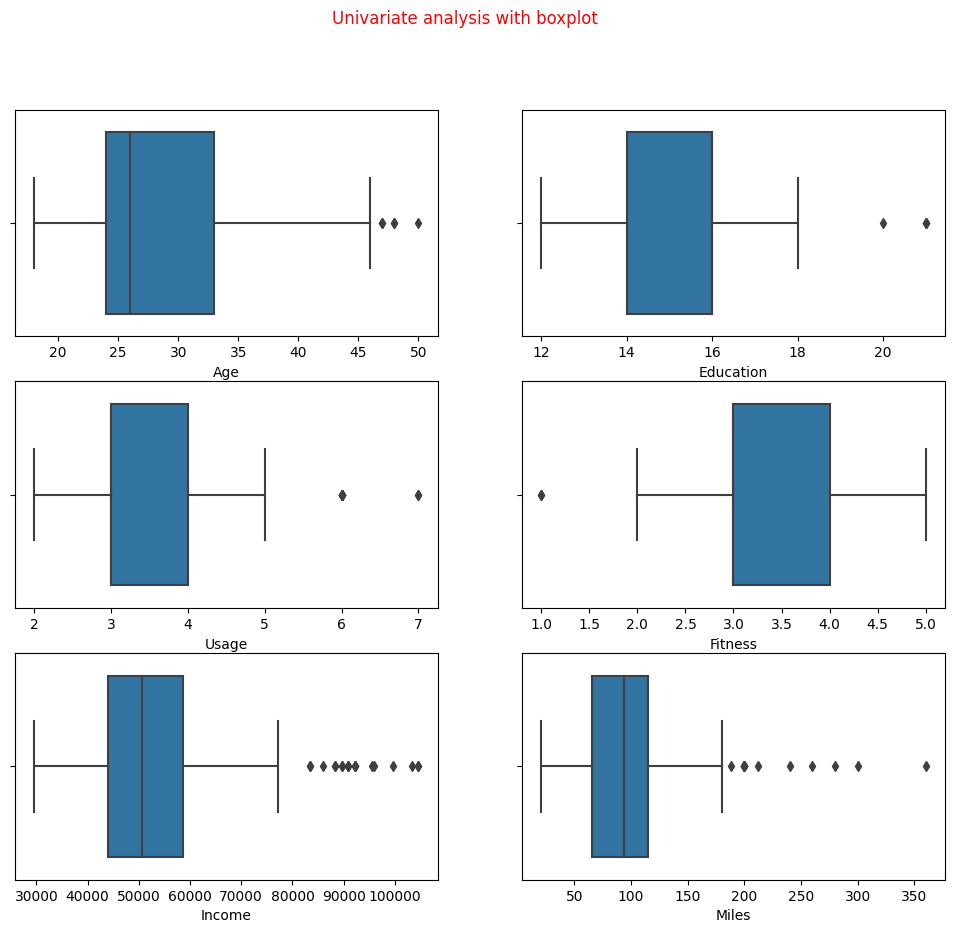

In [ ]:
#Detect outliers using boxplot(Univariate Analysis)
fig, axis= plt.subplots(3,2 , figsize=(12,10))
sns.boxplot(data=df_aerofit,x="Age", orient='h',ax=axis[0,0])
sns.boxplot(data=df_aerofit,x="Education", orient='h',ax=axis[0,1])
sns.boxplot(data=df_aerofit,x="Usage", orient='h',ax=axis[1,0])
sns.boxplot(data=df_aerofit,x="Fitness", orient='h',ax=axis[1,1])
sns.boxplot(data=df_aerofit,x="Income", orient='h',ax=axis[2,0])
sns.boxplot(data=df_aerofit,x="Miles", orient='h',ax=axis[2,1])
fig.suptitle('Univariate analysis with boxplot', color='r', fontsize=12)
plt.show()

**Outlier analysis using boxplots**: There are 6 boxplots plotted above that show outlier values for each of the 6 continious variables: Age, Education, Usage, Fitness, Income & Miles.

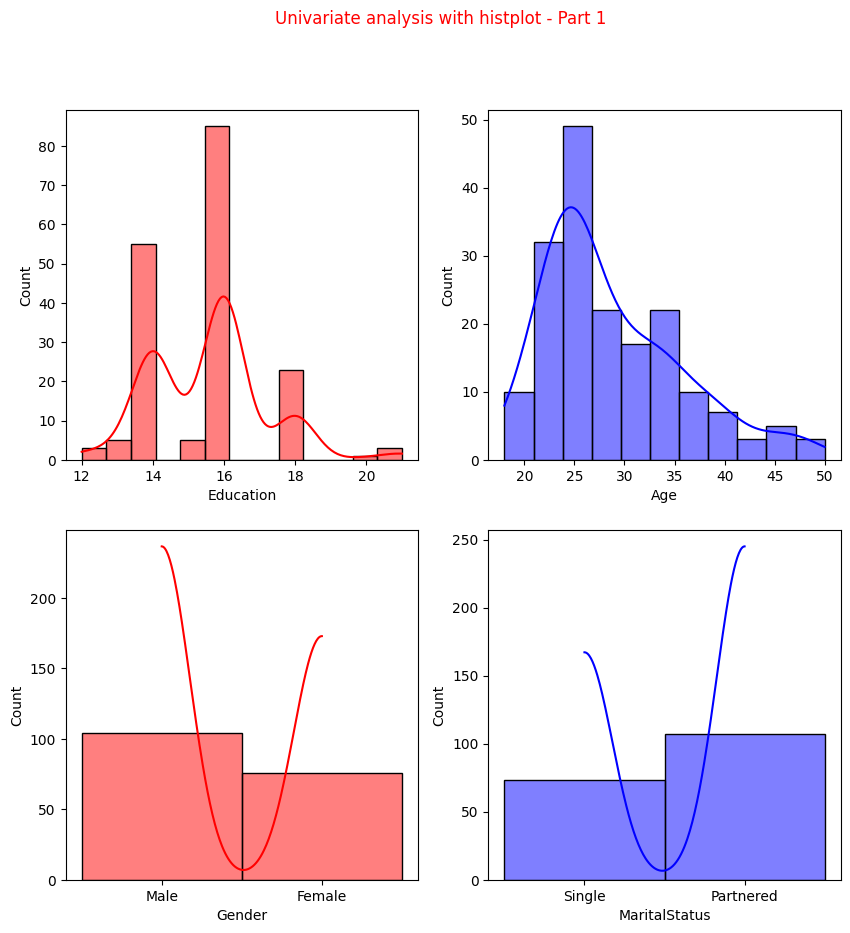

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(10,10))
sns.histplot(data=df_aerofit,x='Education', kde=True, ax=ax[0,0], color='r')
sns.histplot(data=df_aerofit,x='Age', kde=True, ax=ax[0,1], color='b')
sns.histplot(data=df_aerofit,x='Gender', kde=True, ax=ax[1,0], color='r')
sns.histplot(data=df_aerofit,x='MaritalStatus', kde=True, ax=ax[1,1], color='b')
fig.suptitle('Univariate analysis with histplot - Part 1', color='r', fontsize=12)
plt.show()

Text(0.5, 0.98, 'Univariate analysis with histplot - Part 2')

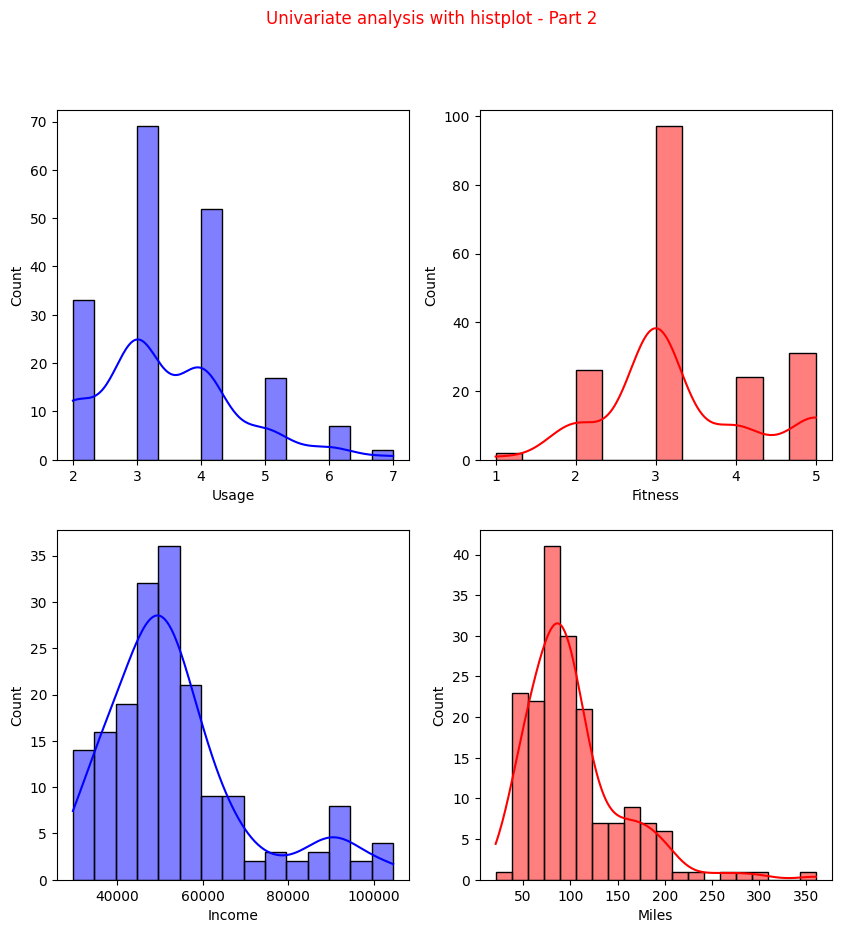

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(10,10))
sns.histplot(data=df_aerofit,x='Usage', kde=True, ax=ax[0,0], color='b')
sns.histplot(data=df_aerofit,x='Fitness', kde=True, ax=ax[0,1], color='r')
sns.histplot(data=df_aerofit,x='Income', kde=True, ax=ax[1,0], color='b')
sns.histplot(data=df_aerofit,x='Miles', kde=True, ax=ax[1,1], color='r')
fig.suptitle('Univariate analysis with histplot - Part 2', color='r', fontsize=12)

1) The 8 histplots plotted above depict the buckets of a range of variables along the horizontal X-axis. The vertical Y_axis represents the count of these buckets.

2) For the 2 histplots in case of categorical variables viz. 'Gender' and 'MaritalStatus', the bucket size is equivalent to the categorical value.

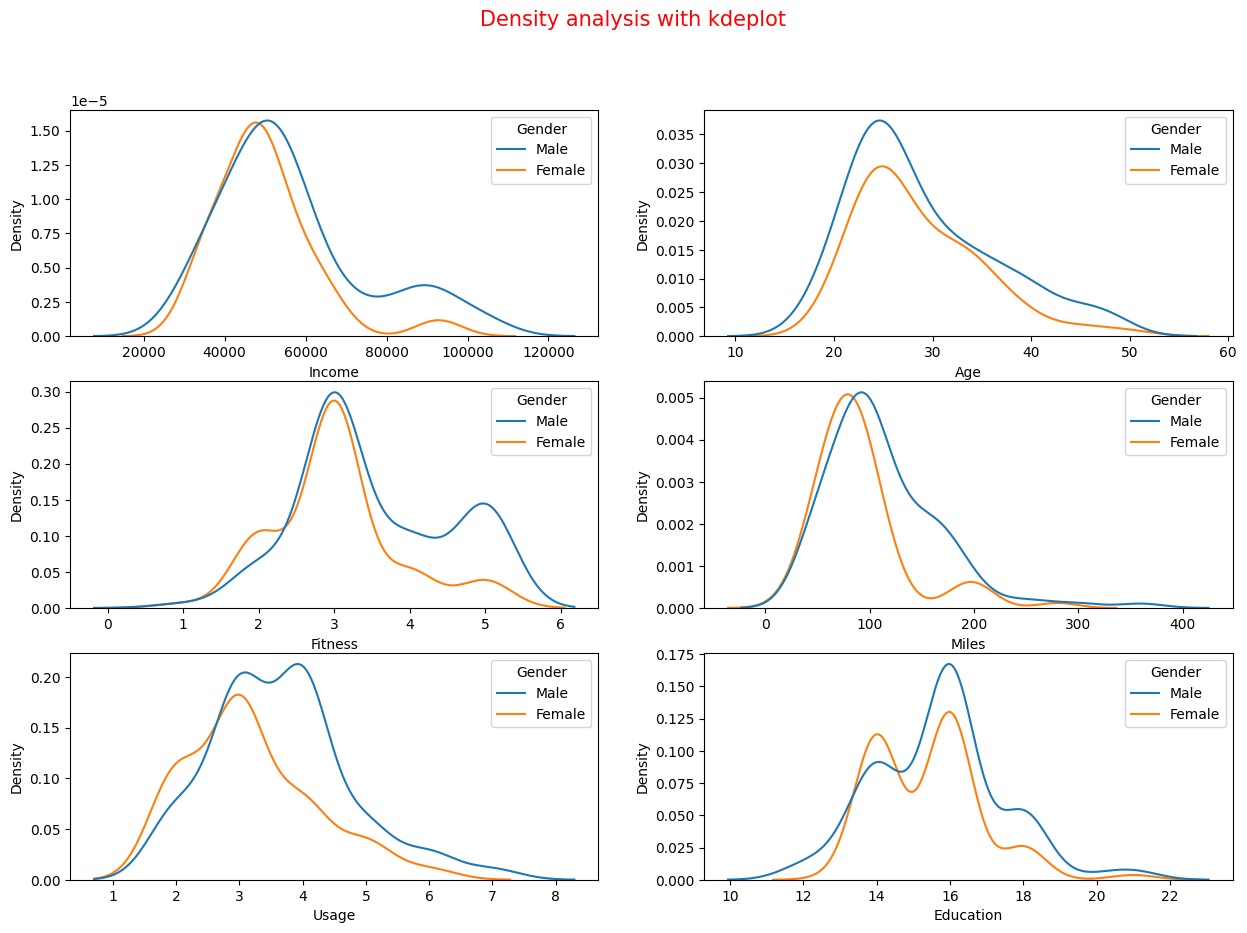

In [ ]:
# Univariate Analysis using kdeplots
fig, ax = plt.subplots(3, 2, figsize=(15,10))
plt.subplot(3,2,1)
sns.kdeplot(data=df_aerofit,x='Income', hue='Gender')
plt.subplot(3,2,2)
sns.kdeplot(x='Age', data=df_aerofit, hue='Gender')
plt.subplot(3,2,3)
sns.kdeplot(x='Fitness', data=df_aerofit, hue='Gender')
plt.subplot(3,2,4)
sns.kdeplot(x='Miles', data=df_aerofit, hue='Gender')
plt.subplot(3,2,5)
sns.kdeplot(x='Usage', data=df_aerofit, hue='Gender')
plt.subplot(3,2,6)
sns.kdeplot(x='Education', data=df_aerofit, hue='Gender')
fig.suptitle('Density analysis with kdeplot', color='r', fontsize=15)
plt.show()

The 6 KDE plots depict the density of the 6 continious variables plotted along X-axis.

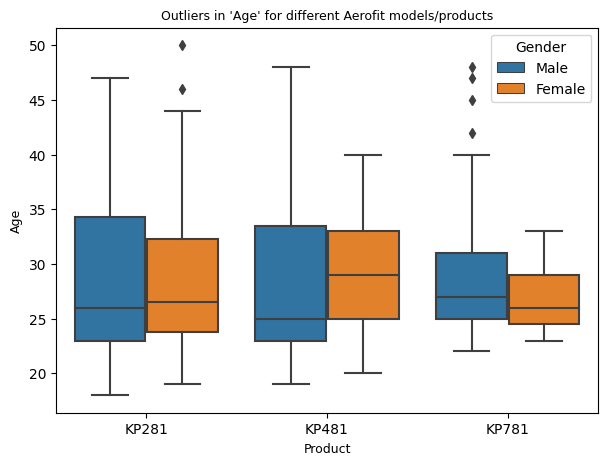

In [ ]:
#Detect outliers using boxplot
plt.figure(figsize = (7,5))
sns.boxplot(x='Product', y='Age', data=df_aerofit, hue='Gender')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.ylabel('Age', fontsize=9)
plt.xlabel('Product', fontsize=9)
plt.title("Outliers in 'Age' for different Aerofit models/products", fontsize=9)
plt.show()

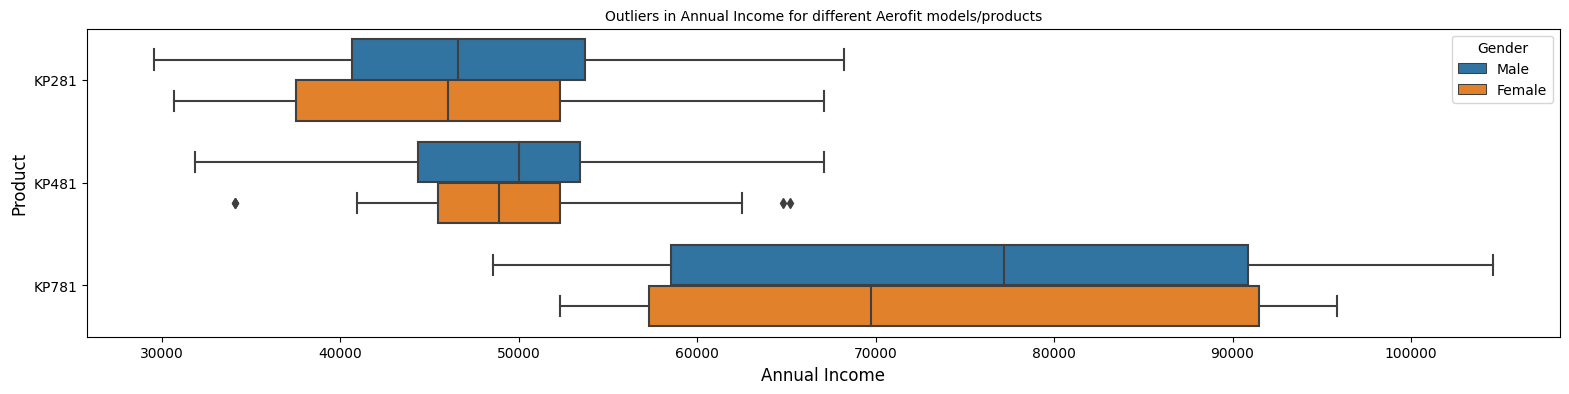

In [ ]:
#Detect outliers using boxplot
plt.figure(figsize = (19,4))
sns.boxplot(y='Product', x='Income', data=df_aerofit, hue='Gender')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Annual Income', fontsize=12)
plt.ylabel('Product', fontsize=12)
plt.title("Outliers in Annual Income for different Aerofit models/products", fontsize=10)
plt.show()

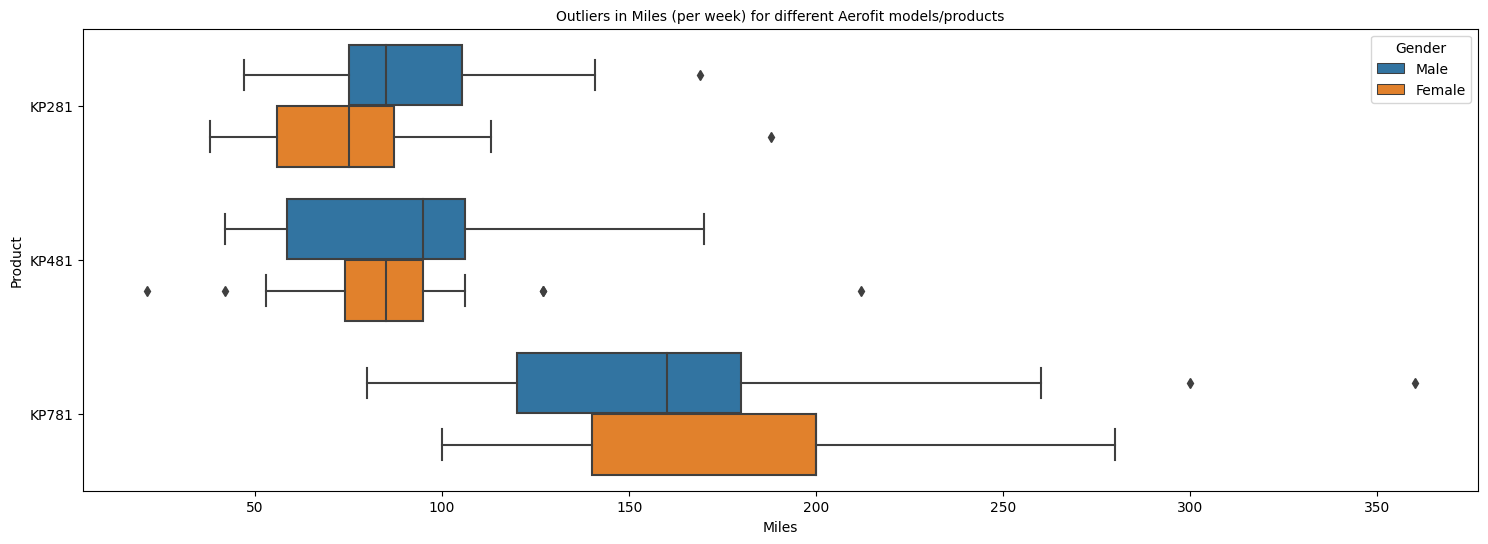

In [ ]:
#Detect outliers using boxplot
plt.figure(figsize = (18,6))
sns.boxplot(y='Product', x='Miles', data=df_aerofit, hue='Gender')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Miles', fontsize=10)
plt.ylabel('Product', fontsize=10)
plt.title("Outliers in Miles (per week) for different Aerofit models/products", fontsize=10)
plt.show()

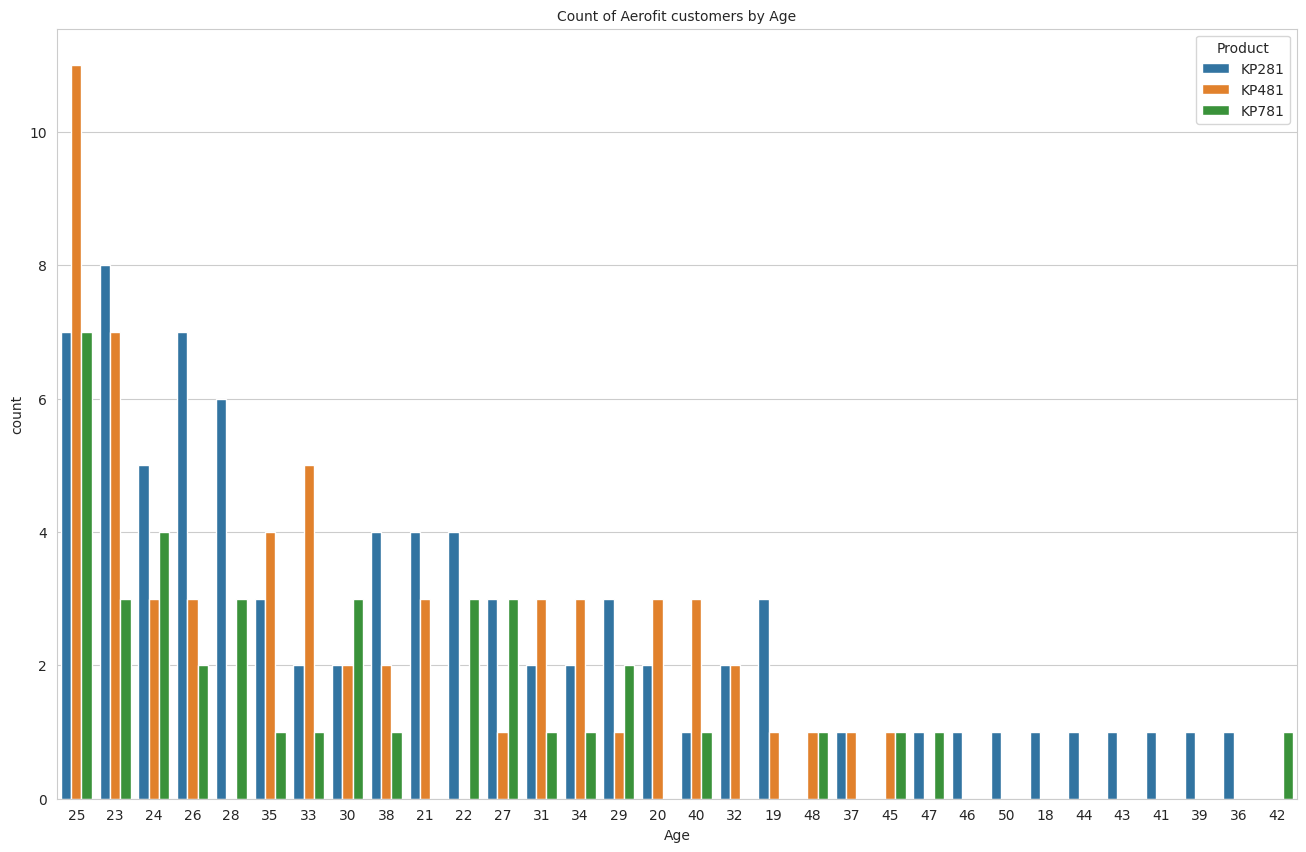

In [ ]:

fig = plt.figure(figsize=(16, 10))
sns.set_style("whitegrid")
sns.countplot(data=df_aerofit, x='Age', order=df_aerofit['Age'].value_counts().index, hue='Product')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Age", fontsize=10)
plt.title('Count of Aerofit customers by Age', fontsize=10)
plt.show()

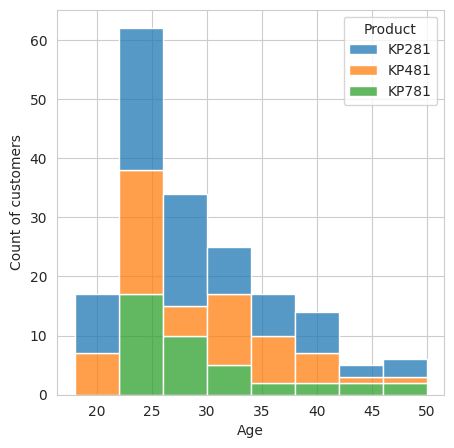

min    18
max    50
Name: Age, dtype: int64

In [ ]:
#Histogram to show distribution by 'Age'
fig = plt.figure(figsize=(5,5))
sns.set_style("whitegrid")
sns.histplot(data=df_aerofit, x="Age", hue="Product", multiple="stack", bins=8)
plt.ylabel('Count of customers', fontsize=10)
plt.xlabel('Age', fontsize=10)
plt.show()
df_aerofit['Age'].aggregate(['min','max'])

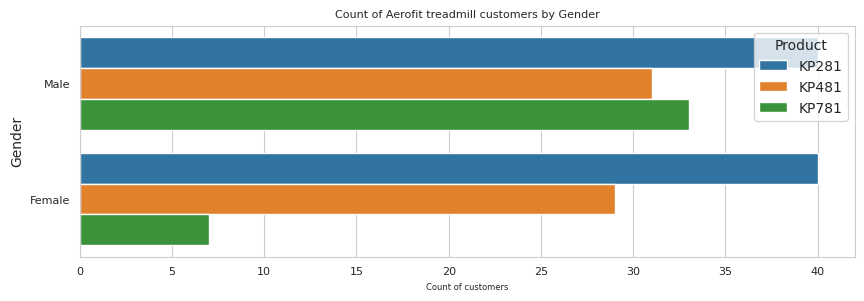

In [ ]:
fig = plt.figure(figsize=(10, 3))
sns.set_style("whitegrid")
sns.countplot(data=df_aerofit, y='Gender', order=df_aerofit['Gender'].value_counts().index, hue='Product')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.xlabel("Count of customers", fontsize=6)
plt.title('Count of Aerofit treadmill customers by Gender', fontsize=8)
plt.show()

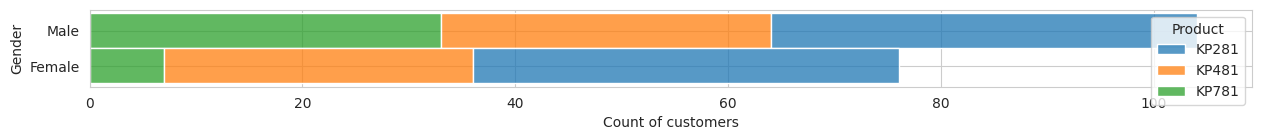

In [ ]:
#Histogram to show distribution by 'Age'
fig = plt.figure(figsize=(15,1))
sns.set_style("whitegrid")
sns.histplot(data=df_aerofit, y="Gender", hue="Product", multiple="stack")
plt.xlabel('Count of customers', fontsize=10)
plt.ylabel('Gender', fontsize=10)
plt.show()

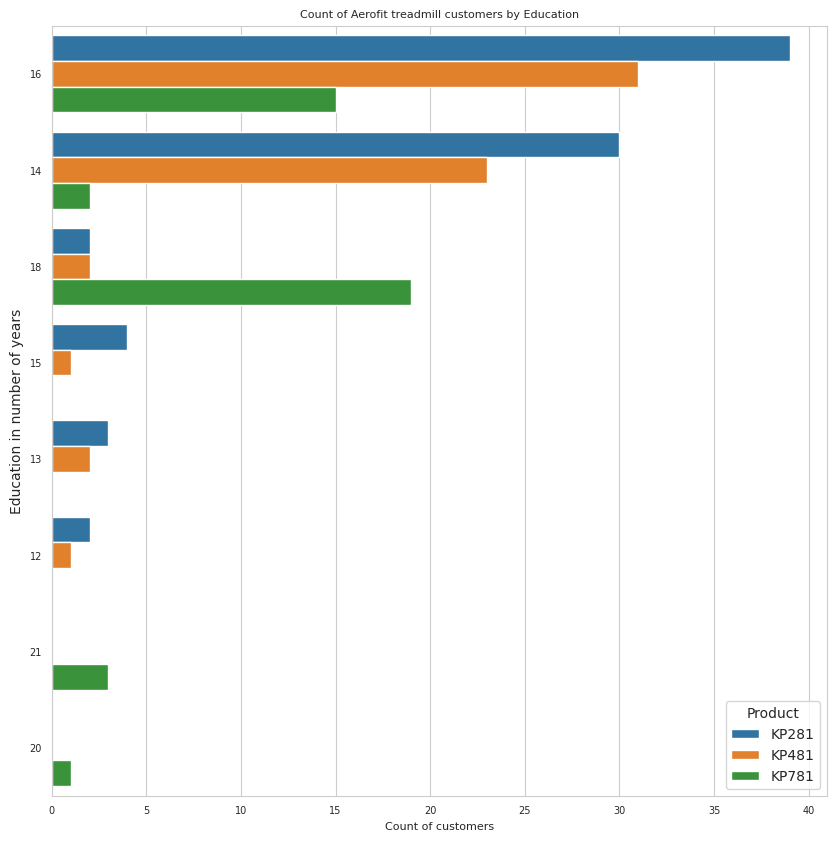

In [ ]:
fig = plt.figure(figsize=(10, 10))
sns.set_style("whitegrid")
sns.countplot(data=df_aerofit, y='Education', order=df_aerofit['Education'].value_counts().index, hue='Product')
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.xlabel("Count of customers", fontsize=8)
plt.ylabel("Education in number of years", fontsize=10)
plt.title('Count of Aerofit treadmill customers by Education', fontsize=8)
plt.show()

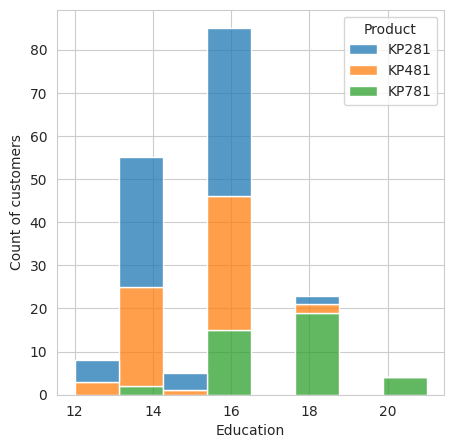

In [ ]:
#Histogram to show distribution by 'Education'
fig = plt.figure(figsize=(5,5))
sns.set_style("whitegrid")
#sns.histplot(data=df_aerofit, y='Education', hue="Product", bins=8)
sns.histplot(data=df_aerofit, x="Education", hue="Product", multiple="stack", bins=8)
plt.ylabel('Count of customers', fontsize=10)
plt.xlabel('Education', fontsize=10)
plt.show()

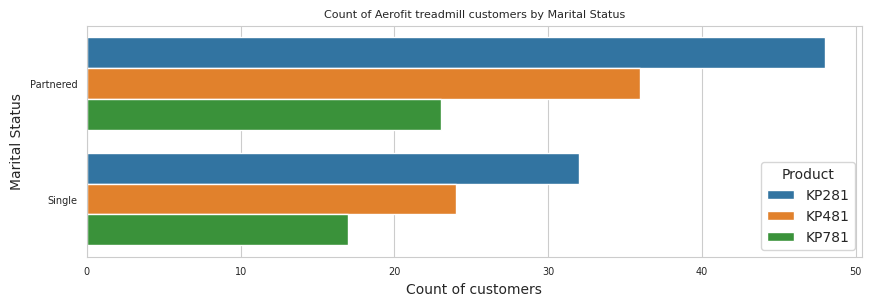

In [ ]:
fig = plt.figure(figsize=(10, 3))
sns.set_style("whitegrid")
sns.countplot(data=df_aerofit, y='MaritalStatus', order=df_aerofit['MaritalStatus'].value_counts().index, hue='Product')
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.xlabel("Count of customers", fontsize=10)
plt.ylabel("Marital Status", fontsize=10)
plt.title('Count of Aerofit treadmill customers by Marital Status', fontsize=8)
plt.show()

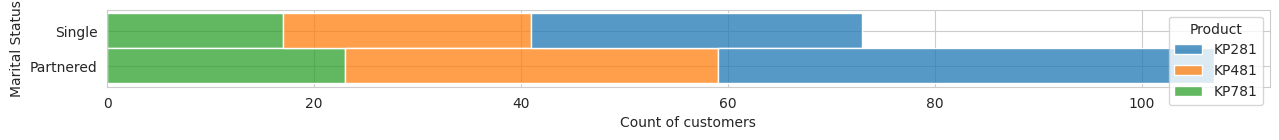

In [ ]:
#Histogram to show distribution by 'Marital Status'
fig = plt.figure(figsize=(15,1))
sns.set_style("whitegrid")
sns.histplot(data=df_aerofit, y="MaritalStatus", hue="Product", multiple="stack", bins=8)
plt.xlabel('Count of customers', fontsize=10)
plt.ylabel('Marital Status', fontsize=10)
plt.show()

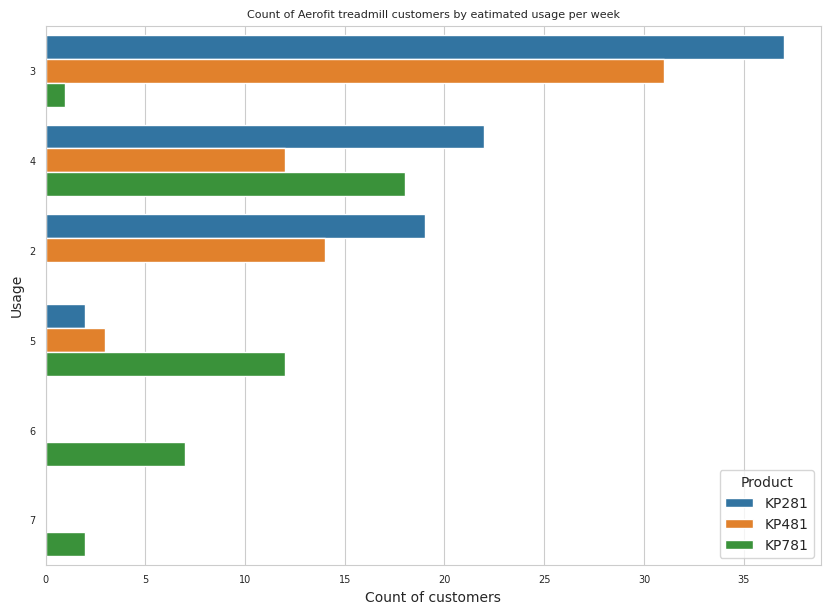

In [ ]:
#Customers / products sold by usage per week
fig = plt.figure(figsize=(10, 7))
sns.set_style("whitegrid")
sns.countplot(data=df_aerofit, y='Usage', order=df_aerofit['Usage'].value_counts().index, hue='Product')
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.xlabel("Count of customers", fontsize=10)
plt.ylabel("Usage", fontsize=10)
plt.title('Count of Aerofit treadmill customers by eatimated usage per week', fontsize=8)
plt.show()

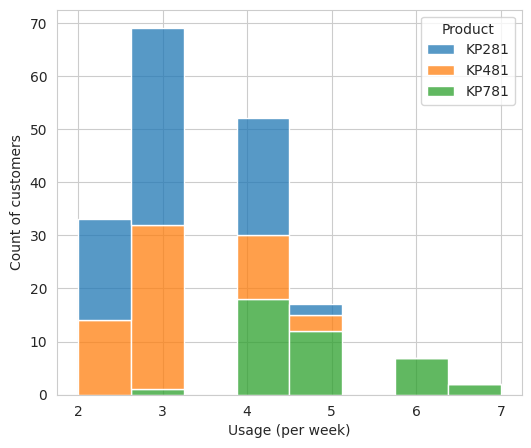

In [ ]:
#Histogram to show distribution by 'Usage'
fig = plt.figure(figsize=(6,5))
sns.set_style("whitegrid")
sns.histplot(data=df_aerofit, x="Usage", hue="Product", multiple="stack", bins=8)
plt.ylabel('Count of customers', fontsize=10)
plt.xlabel('Usage (per week)', fontsize=10)
plt.show()

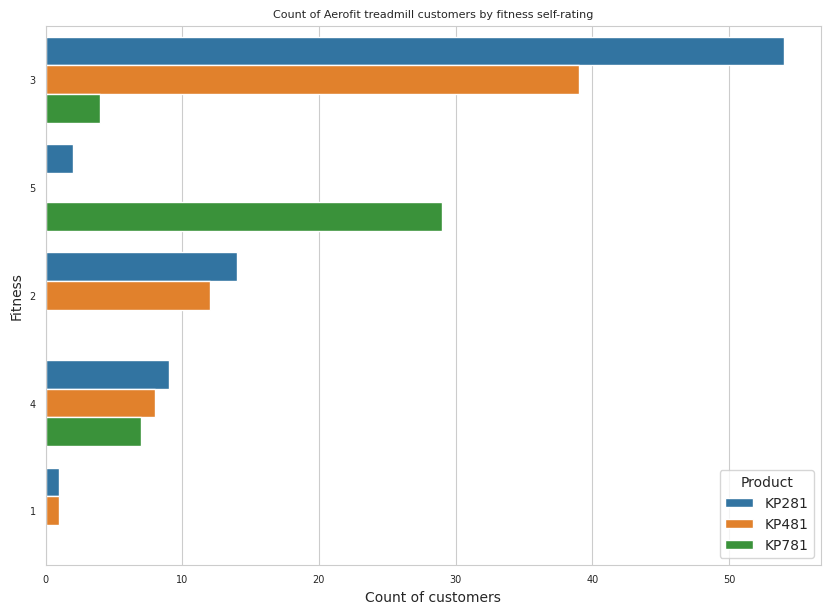

In [ ]:
#Products sold/customer count by self rated fitness
fig = plt.figure(figsize=(10, 7))
sns.set_style("whitegrid")
sns.countplot(data=df_aerofit, y='Fitness', order=df_aerofit['Fitness'].value_counts().index, hue='Product')
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.xlabel("Count of customers", fontsize=10)
plt.ylabel("Fitness", fontsize=10)
plt.title('Count of Aerofit treadmill customers by fitness self-rating', fontsize=8)
plt.show()

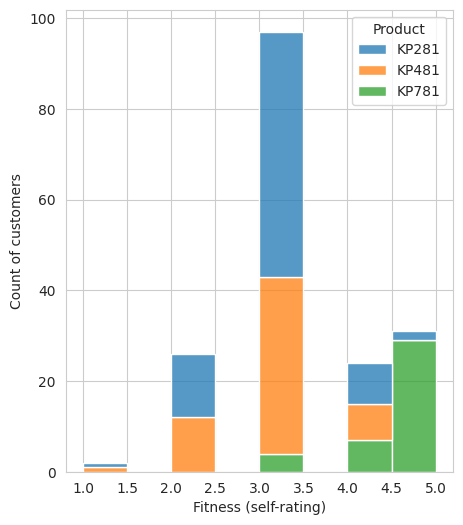

In [ ]:
#Histogram to show distribution by 'Usage'
fig = plt.figure(figsize=(5,6))
sns.set_style("whitegrid")
sns.histplot(data=df_aerofit, x="Fitness", hue="Product", multiple="stack", bins=8)
plt.ylabel('Count of customers', fontsize=10)
plt.xlabel('Fitness (self-rating)', fontsize=10)
plt.show()

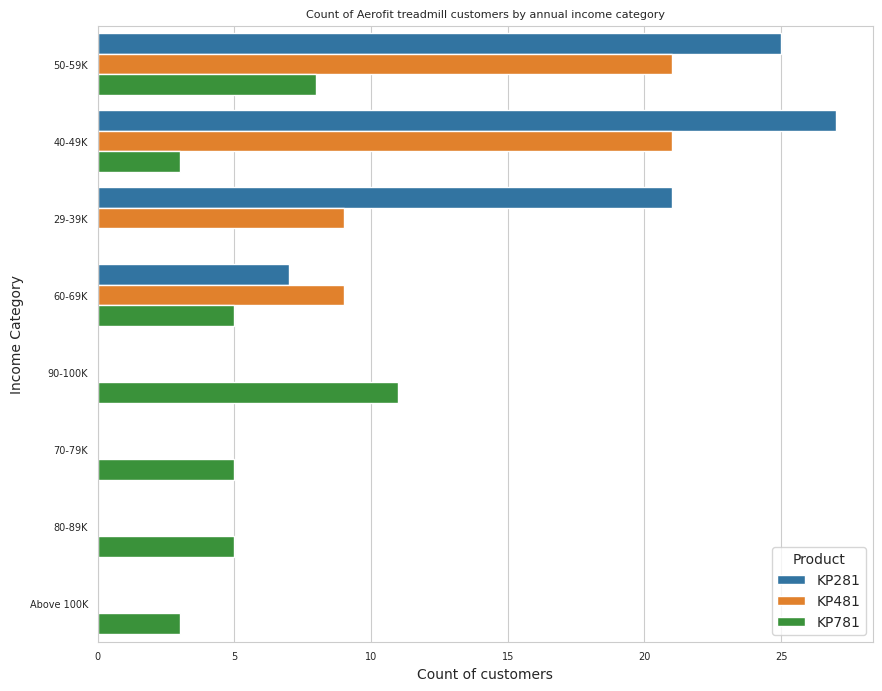

In [ ]:
fig = plt.figure(figsize=(10, 8))
sns.set_style("whitegrid")
sns.countplot(data=df_aerofit, y='income_category', order=df_aerofit['income_category'].value_counts().index, hue='Product')
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.xlabel("Count of customers", fontsize=10)
plt.ylabel("Income Category", fontsize=10)
plt.title('Count of Aerofit treadmill customers by annual income category', fontsize=8)
plt.show()

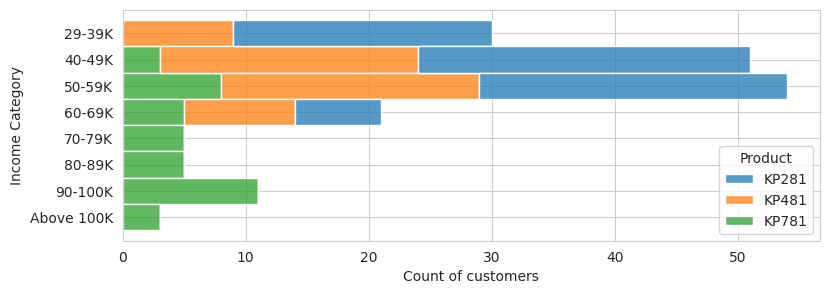

In [ ]:
#Histogram to show distribution by 'Income category'
fig = plt.figure(figsize=(9,3))
sns.set_style("whitegrid")
sns.histplot(data=df_aerofit, y="income_category", hue="Product", multiple="stack", bins=8)
plt.xlabel('Count of customers', fontsize=10)
plt.ylabel('Income Category', fontsize=10)
plt.show()

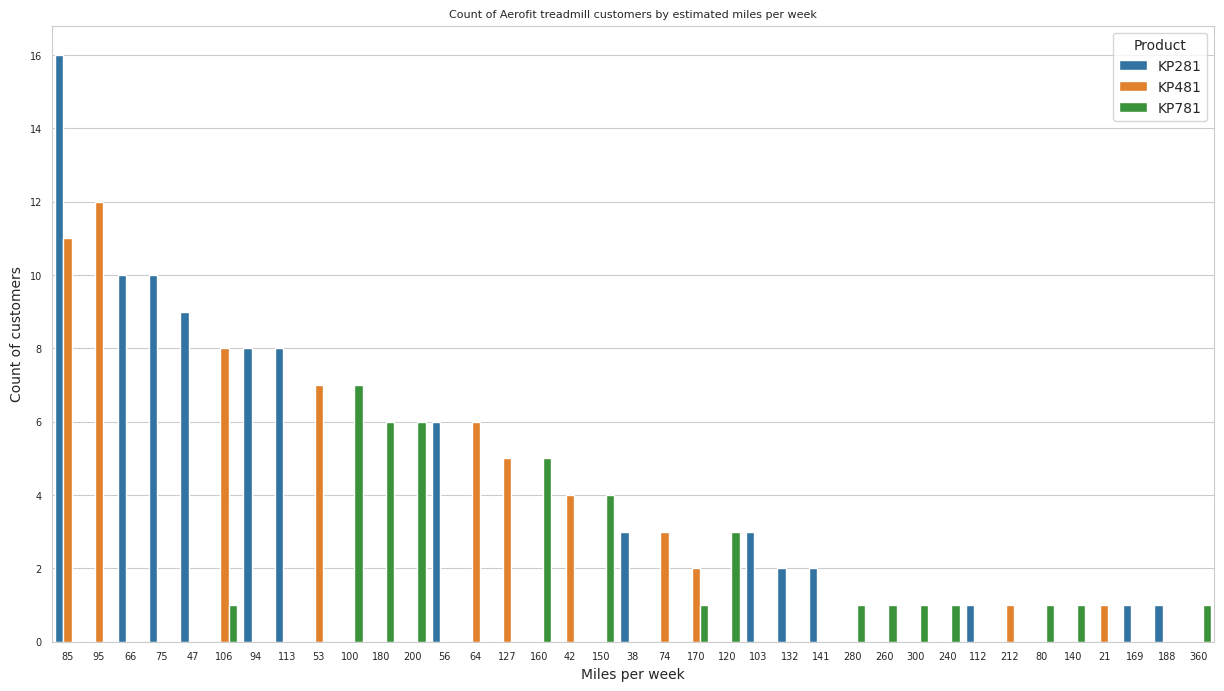

In [ ]:
fig = plt.figure(figsize=(15, 8))
sns.set_style("whitegrid")
sns.countplot(data=df_aerofit, x='Miles', order=df_aerofit['Miles'].value_counts().index, hue='Product')
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.ylabel("Count of customers", fontsize=10)
plt.xlabel("Miles per week", fontsize=10)
plt.title('Count of Aerofit treadmill customers by estimated miles per week', fontsize=8)
plt.show()

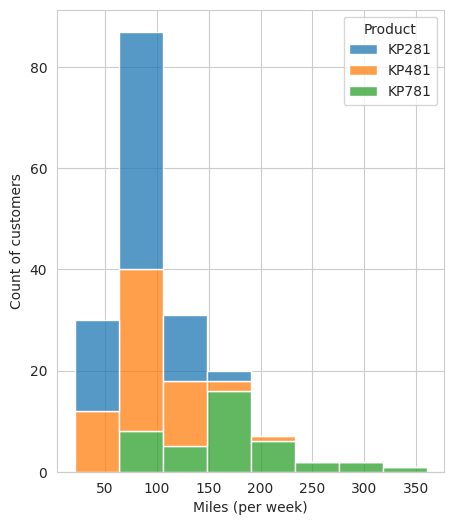

In [ ]:
#Histogram to show distribution by 'Usage'
fig = plt.figure(figsize=(5,6))
sns.set_style("whitegrid")
sns.histplot(data=df_aerofit, x="Miles", hue="Product", multiple="stack", bins=8)
plt.ylabel('Count of customers', fontsize=10)
plt.xlabel('Miles (per week)', fontsize=10)
plt.show()

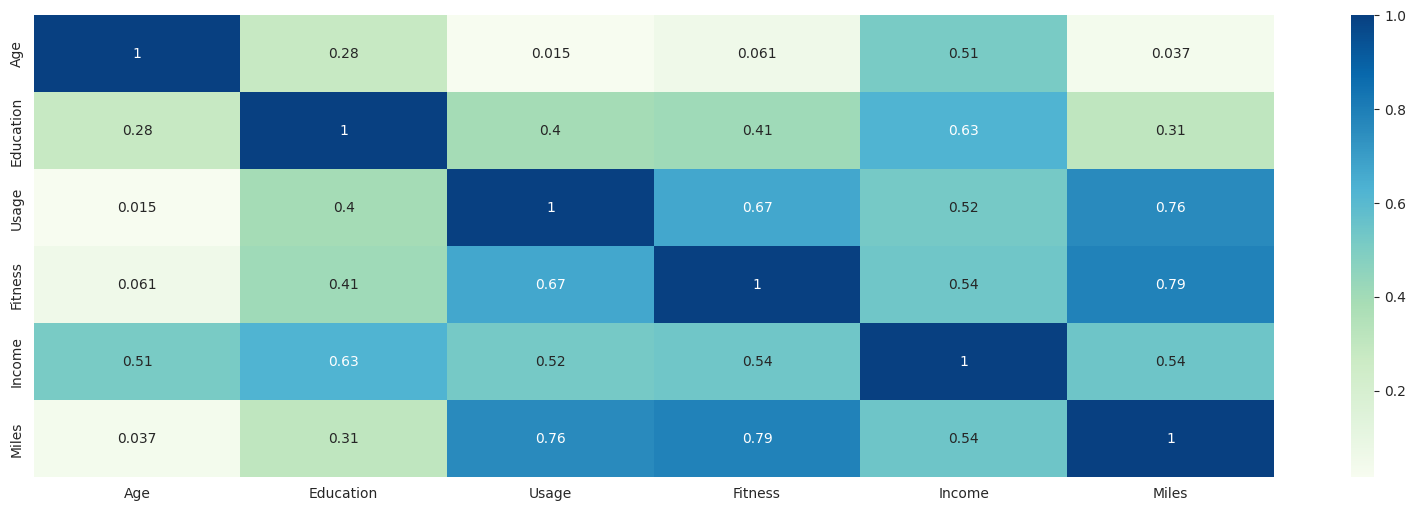

In [ ]:
#Correlation HeatMap
plt.figure(figsize=(20,6))
ax = sns.heatmap(df_aerofit.corr(),annot=True,cmap='GnBu')
plt.show()

Some of the observations from the HeatMap, the correlation is as follows:

1) Correlation between Age and Miles is 0.03

2) Correlation between Education and Income is 0.63

3) Correlation between Usage and Fitness is 0.67

4) Correlation between Fitness and Age is 0.06

5) Correlation between Income and Usage is 0.52


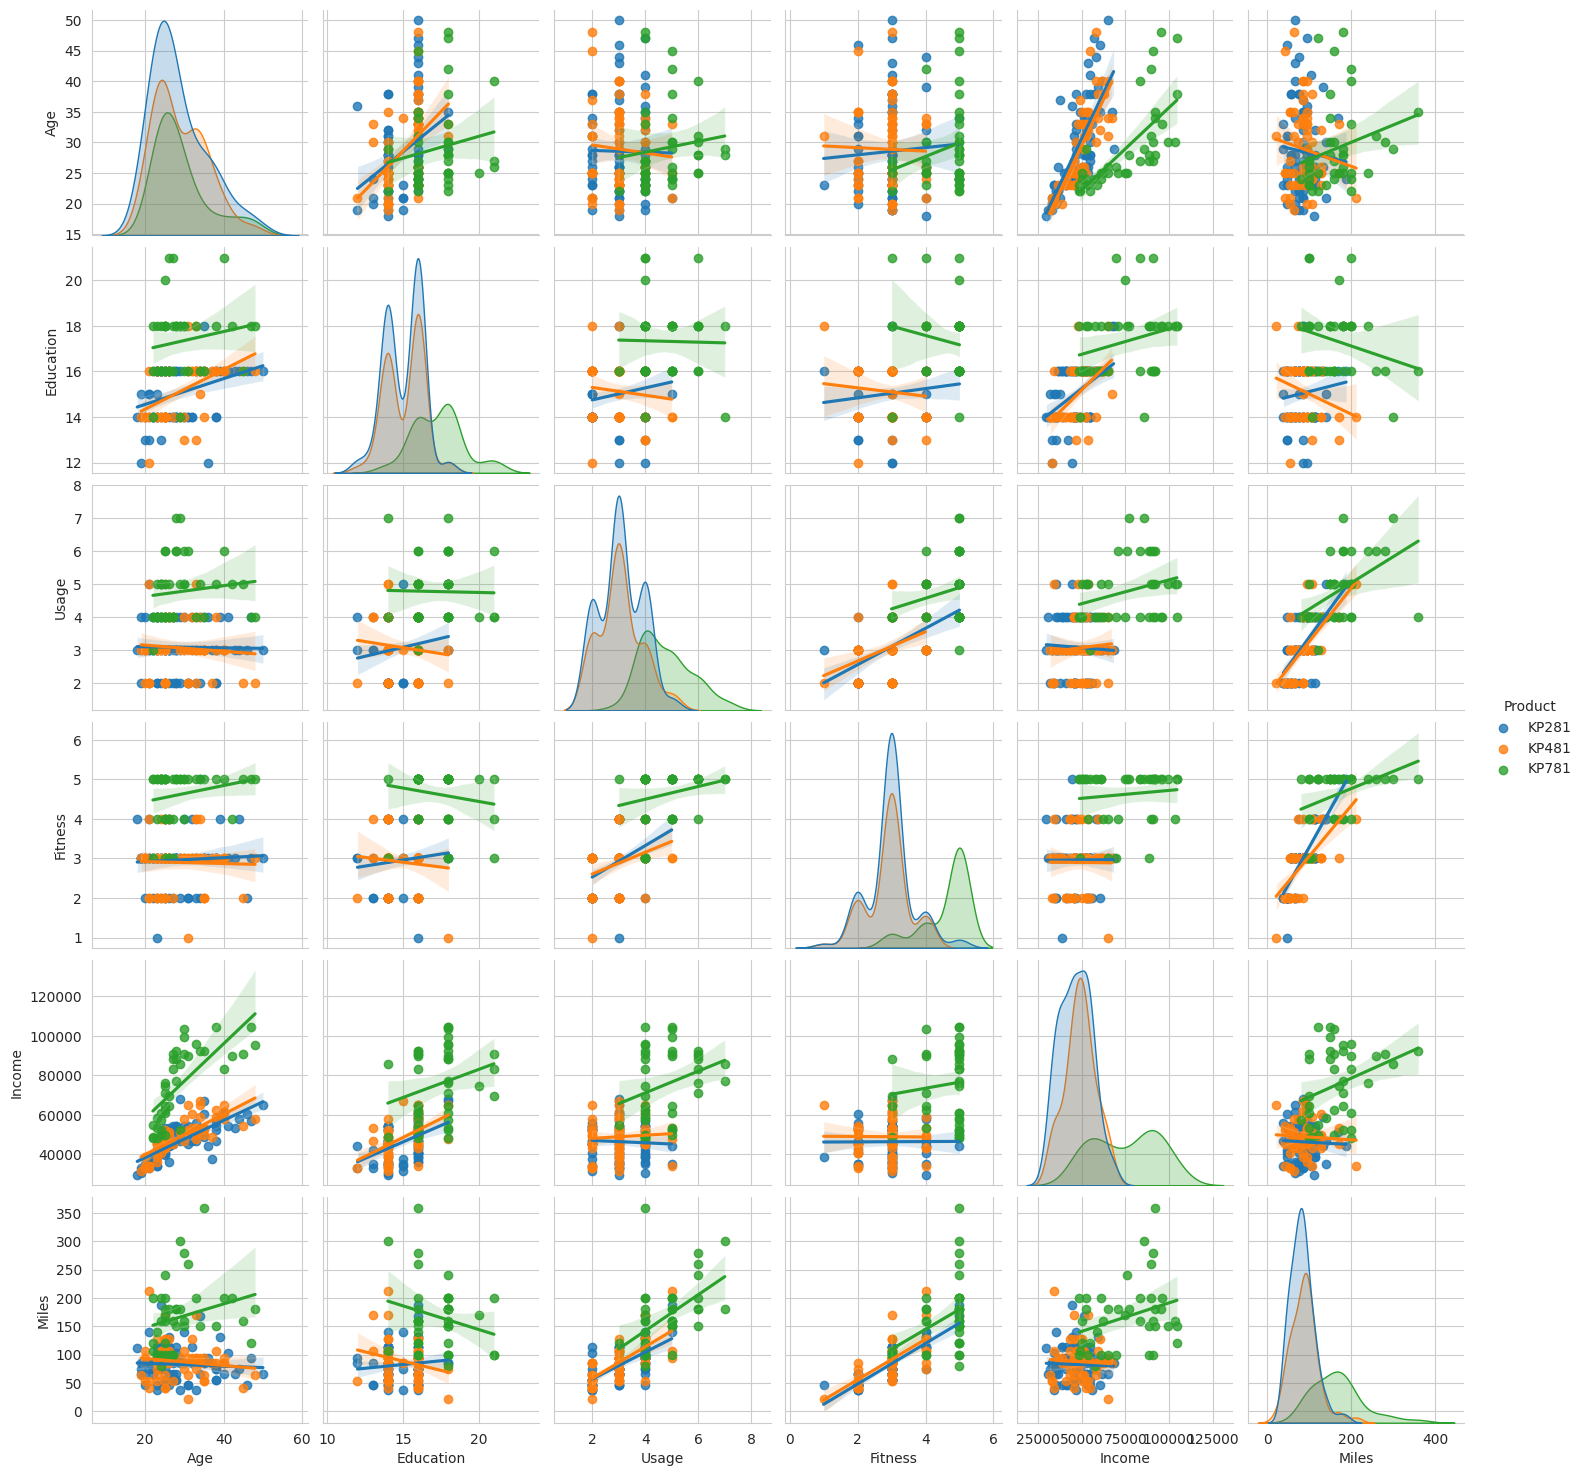

In [ ]:
# Bivariate analysis using Pair Plots
sns.pairplot(df_aerofit,hue='Product',kind='reg')
plt.show()

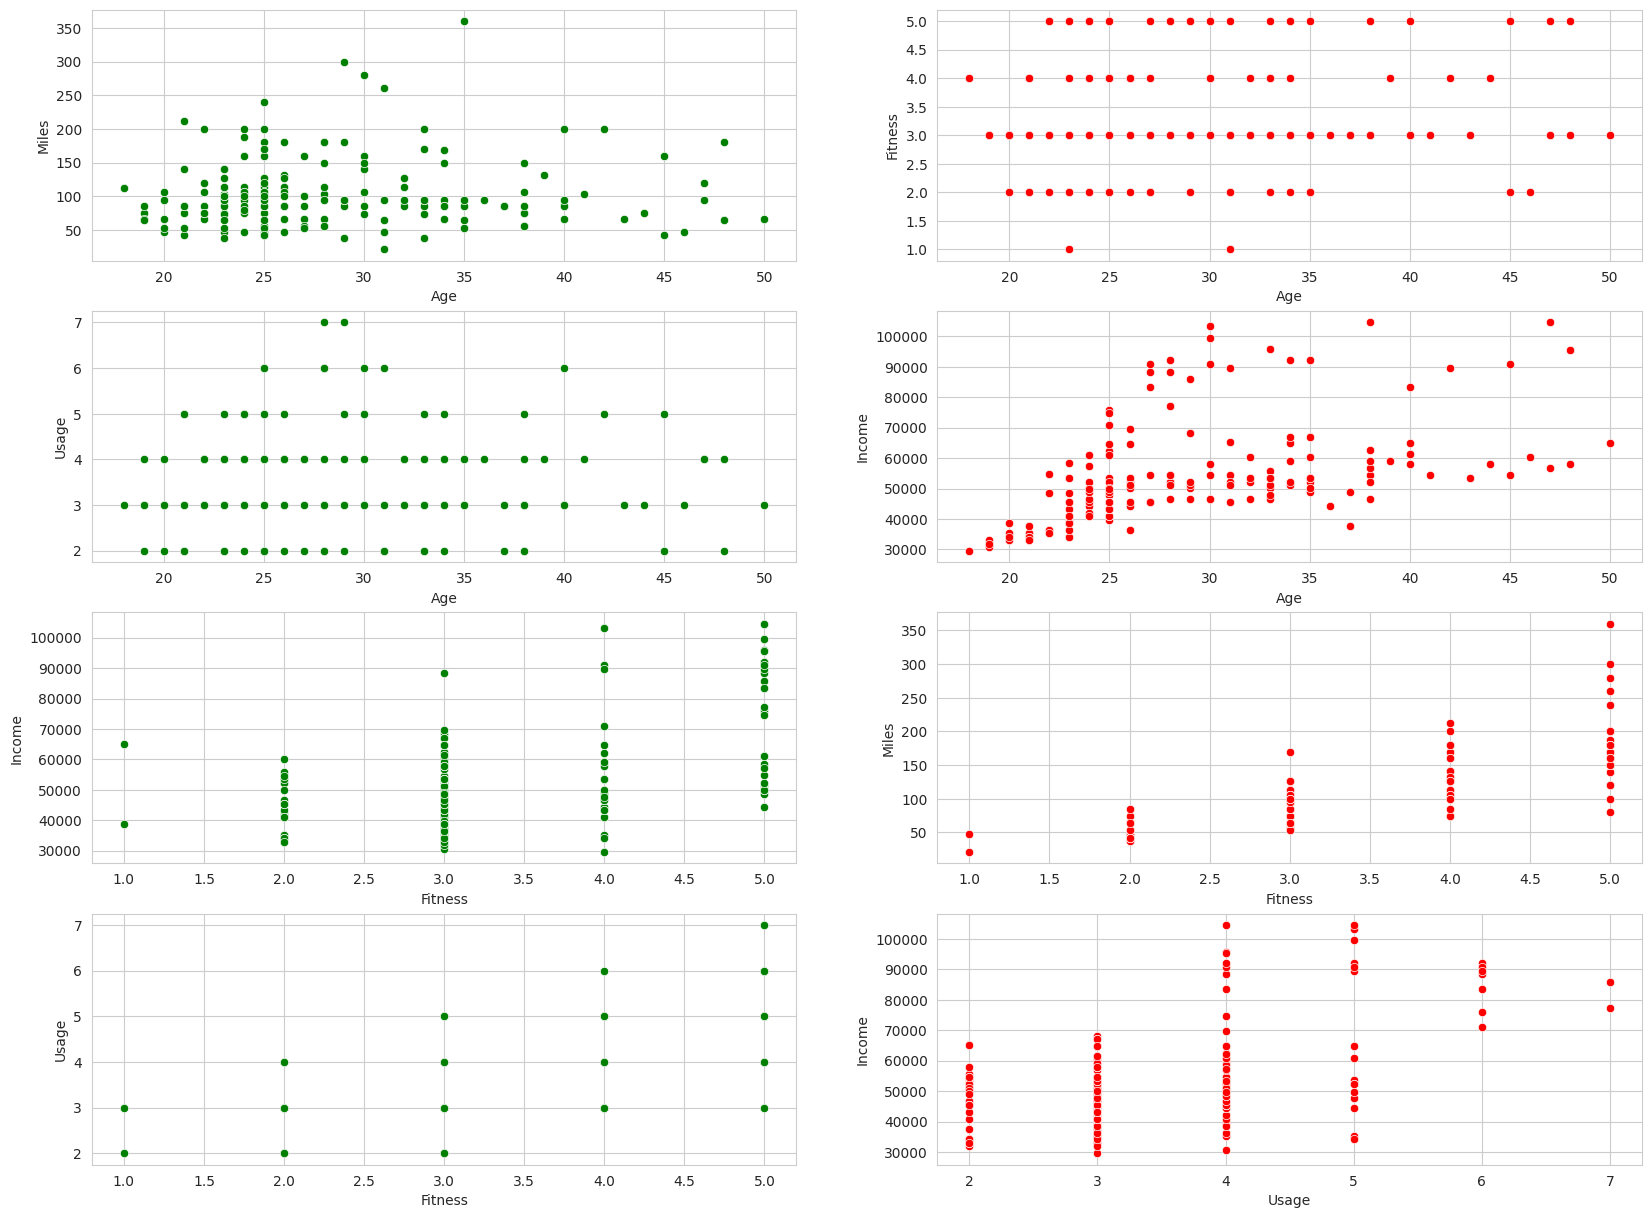

In [ ]:
#Bivariate analysis using scatterplots
fig, ax = plt.subplots(4, 2, figsize=(20,15))
plt.subplot(4,2,1)
sns.scatterplot(x='Age', y='Miles', data=df_aerofit, color='g')
plt.subplot(4,2,2)
sns.scatterplot(x='Age', y='Fitness', data=df_aerofit, color='r')
plt.subplot(4,2,3)
sns.scatterplot(x='Age', y='Usage', data=df_aerofit, color='g')
plt.subplot(4,2,4)
sns.scatterplot(x='Age', y='Income', data=df_aerofit, color='r')
plt.subplot(4,2,5)
sns.scatterplot(x='Fitness', y='Income', data=df_aerofit, color='g')
plt.subplot(4,2,6)
sns.scatterplot(x='Fitness', y='Miles', data=df_aerofit, color='r')
plt.subplot(4,2,7)
sns.scatterplot(x='Fitness', y='Usage', data=df_aerofit, color='g')
plt.subplot(4,2,8)
sns.scatterplot(x='Usage', y='Income', data=df_aerofit, color='r')
plt.show()

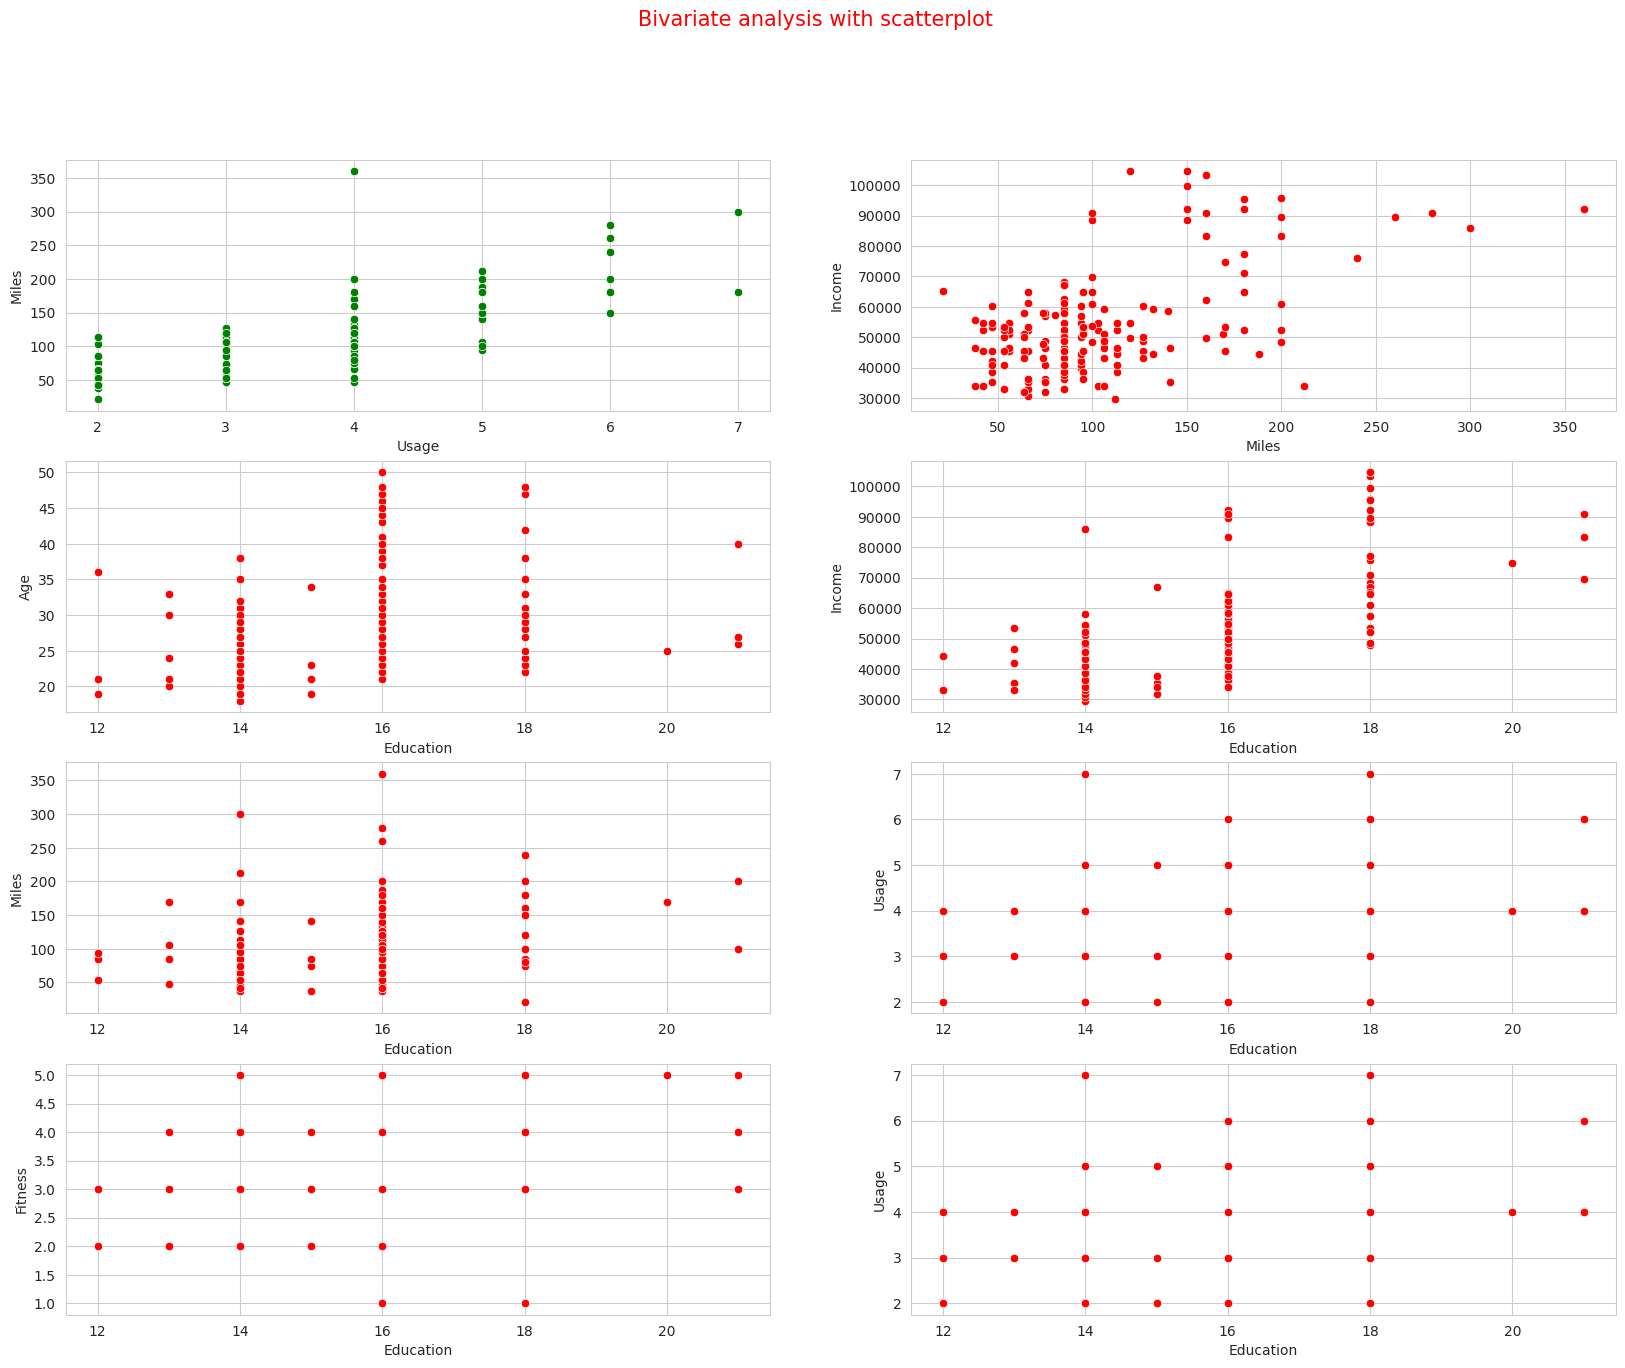

In [ ]:
fig, ax = plt.subplots(4, 2, figsize=(20,15))
plt.subplot(4,2,1)
sns.scatterplot(x='Usage', y='Miles', data=df_aerofit, color='g')
plt.subplot(4,2,2)
sns.scatterplot(x='Miles', y='Income', data=df_aerofit, color='r')
plt.subplot(4,2,3)
sns.scatterplot(x='Education', y='Age', data=df_aerofit, color='r')
plt.subplot(4,2,4)
sns.scatterplot(x='Education', y='Income', data=df_aerofit, color='r')
plt.subplot(4,2,5)
sns.scatterplot(x='Education', y='Miles', data=df_aerofit, color='r')
plt.subplot(4,2,6)
sns.scatterplot(x='Education', y='Usage', data=df_aerofit, color='r')
plt.subplot(4,2,7)
sns.scatterplot(x='Education', y='Fitness', data=df_aerofit, color='r')
plt.subplot(4,2,8)
sns.scatterplot(x='Education', y='Usage', data=df_aerofit, color='r')
fig.suptitle('Bivariate analysis with scatterplot', color='r', fontsize=15)
plt.show()

In [ ]:
#Marginal Probability for products
pd.concat(  [df_aerofit.Product.value_counts(), df_aerofit.Product.value_counts(normalize=True).round(2)],
            keys=['counts', 'marginal_probability'],
            axis=1
          )

,counts,marginal_probability
KP281,80,0.44
KP481,60,0.33
KP781,40,0.22


1) 44% of the customers are - KP281

2) 33% of the customers are - KP481

3) 22% of the customers are - KP781

In [ ]:
#Marginal Probability for Gender
pd.concat(  [df_aerofit.Gender.value_counts(), df_aerofit.Gender.value_counts(normalize=True).round(2)],
            keys=['counts', 'marginal_probability'],
            axis=1
          )

,counts,marginal_probability
Male,104,0.58
Female,76,0.42


1) 58% of the customers are Male.

2) 42% of the customers are Female.

In [ ]:
#Marginal Probability for MaritalStatus
pd.concat(  [df_aerofit.MaritalStatus.value_counts(), df_aerofit.MaritalStatus.value_counts(normalize=True).round(2)],
            keys=['counts', 'marginal_probability'],
            axis=1
          )

,counts,marginal_probability
Partnered,107,0.59
Single,73,0.41


1) 59% of the customers are Partnered.

2) 41% of the customers are Single.

In [ ]:
#Marginal Probability for Age Category
pd.concat(  [df_aerofit.age_category.value_counts(), df_aerofit.age_category.value_counts(normalize=True).round(2)],
            keys=['counts', 'marginal_probability'],
            axis=1
          )

,counts,marginal_probability
Adult(23-35),128,0.71
Young(18-22),24,0.13
Middle-Age(36-45),22,0.12
Over 45,6,0.03


1) 71% of the customers are Adult in the range of 23-35 years.

2) 13% of the customers are Young Adults in the range of 18-22 years.

3) 12% of the customers are Middle Age in the range of 36-45 years.

4) 3% of the customers are Over 45.

In [ ]:
#Marginal Probability for Fitness Category
pd.concat(  [df_aerofit.fitness_category.value_counts(), df_aerofit.fitness_category.value_counts(normalize=True).round(2)],
            keys=['counts', 'marginal_probability'],
            axis=1
          )

,counts,marginal_probability
Average Shape,97,0.54
Excellent Shape,31,0.17
Bad Shape,26,0.14
Good Shape,24,0.13
Poor Shape,2,0.01


1) 54% of the customers are Average Shape.

2) 17% of the customers are Excellent Shape.

3) 14% of the customers are Bad Shape.

4) 13% of the customers are Good Shape.

5) 1% of the customers are in Poor Shape.

Marginal Probabilities for different income categories.

In [ ]:
#Marginal Probability for Income Category
pd.concat(  [df_aerofit.income_category.value_counts(), df_aerofit.income_category.value_counts(normalize=True).round(2)],
            keys=['counts', 'marginal_probability'],
            axis=1
          )

,counts,marginal_probability
50-59K,54,0.30
40-49K,51,0.28
29-39K,30,0.17
60-69K,21,0.12
90-100K,11,0.06
70-79K,5,0.03
80-89K,5,0.03
Above 100K,3,0.02


Marginal Probability for gender

In [ ]:
def calc_marginal_prob_gender():
  df_t = pd.crosstab(index=df_aerofit['Gender'], columns=[df_aerofit['Product']])
  print("P(Male):", end= " ")
  print((df_t.loc['Male'].sum()/df_aerofit.shape[0]).round(2))
  print("P(Female):", end=" ")
  print((df_t.loc['Female'].sum()/df_aerofit.shape[0]).round(2))
calc_marginal_prob_gender()

P(Male): 0.58
P(Female): 0.42


Conditional Probability: The probability of each Product given the gender of the customer.

In [ ]:
def calc_prob_gender(gender, marginal_prob=False):
    if gender not in ["Female", "Male"]:
        return "Invalid gender!"
    df_t = pd.crosstab(index=df_aerofit['Gender'], columns=[df_aerofit['Product']])
    #df1_t = pd.crosstab(index=df_aerofit['Gender'], columns=[df_aerofit['Product']], normalize='index')
    #df2_t = pd.crosstab(index=df_aerofit['Gender'], columns=[df_aerofit['Product']], normalize='columns')
    #print(df_t)
    #print(df1_t)
    #print(df2_t)
    p781 = df_t['KP781'][gender] / df_t.loc[gender].sum()
    p481 = df_t['KP481'][gender] / df_t.loc[gender].sum()
    p281 = df_t['KP281'][gender] / df_t.loc[gender].sum()

    print(f"P(KP781/{gender}): {p781:.2f}")
    print(f"P(KP481/{gender}): {p481:.2f}")
    print(f"P(KP281/{gender}): {p281:.2f}\n")

calc_prob_gender('Female')
calc_prob_gender('Male')

P(KP781/Female): 0.09
P(KP481/Female): 0.38
P(KP281/Female): 0.53

P(KP781/Male): 0.32
P(KP481/Male): 0.30
P(KP281/Male): 0.38



1) 58% of customers are male and 42% of the customers are female.

2) Out of all customers with Gender="Male", 32% bought KP781, 30% bought KP481, 38% bought KP281.

3) Out of all customers with Gender="Female", 9% bought KP781, 38% bought KP481, 53% bought KP281.


Conditional Probability: The probability of each Product given the MaritalStatus of the customer.

In [ ]:
def calc_prob_maritalstatus(MaritalStatus, marginal_prob=False):
    if MaritalStatus not in ["Single", "Partnered"]:
        return "Invalid MaritalStatus!"

    df_t = pd.crosstab(index=df_aerofit['MaritalStatus'], columns=[df_aerofit['Product']])
    df1_t = pd.crosstab(index=df_aerofit['MaritalStatus'], columns=[df_aerofit['Product']], normalize='index')
    #print(df1_t)
    p781 = df_t['KP781'][MaritalStatus] / df_t.loc[MaritalStatus].sum()
    p481 = df_t['KP481'][MaritalStatus] / df_t.loc[MaritalStatus].sum()
    p281 = df_t['KP281'][MaritalStatus] / df_t.loc[MaritalStatus].sum()
    if marginal_prob==True:
      print(f"P(Single): {df_t.loc['Single'].sum()/df_aerofit.shape[0]:.2f}")
      print(f"P(Partnered): {df_t.loc['Partnered'].sum()/df_aerofit.shape[0]:.2f}\n")

    print(f"P(KP781/{MaritalStatus}): {p781:.2f}")
    print(f"P(KP481/{MaritalStatus}): {p481:.2f}")
    print(f"P(KP281/{MaritalStatus}): {p281:.2f}\n")

calc_prob_maritalstatus('Single', True)
calc_prob_maritalstatus('Partnered')

P(Single): 0.41
P(Partnered): 0.59

P(KP781/Single): 0.23
P(KP481/Single): 0.33
P(KP281/Single): 0.44

P(KP781/Partnered): 0.21
P(KP481/Partnered): 0.34
P(KP281/Partnered): 0.45



1) 41% of customers are Single and 59% of the customers are Partnered.

2) Out of all Single Customers, 23% bought KP781, 33% bought KP481, 44% bought KP281.

3) Out of all Partnered customers, 21% bought KP781, 34% bought KP481, 45% bought KP281.


In [ ]:
pd.crosstab(index=df_aerofit['Product'], columns=[df_aerofit['Gender']])

Gender,Female,Male
Product,,
KP281,40,40
KP481,29,31
KP781,7,33


In [ ]:
pd.crosstab(index=df_aerofit['Product'], columns=[df_aerofit['MaritalStatus'], df_aerofit['Gender']])

MaritalStatus Partnered      Single     
Gender           Female Male Female Male
Product                                 
KP281                27   21     13   19
KP481                15   21     14   10
KP781                 4   19      3   14

In [ ]:
pd.crosstab(index=df_aerofit['Product'], columns=[df_aerofit['age_category']])

age_category,Young(18-22),Adult(23-35),Middle-Age(36-45),Over 45
Product,,,,
KP281,14,52,11,3
KP481,7,45,7,1
KP781,3,31,4,2


In [ ]:
pd.crosstab(index=df_aerofit['Product'], columns=[df_aerofit['age_category']], normalize='columns').round(2)

age_category,Young(18-22),Adult(23-35),Middle-Age(36-45),Over 45
Product,,,,
KP281,0.58,0.41,0.50,0.50
KP481,0.29,0.35,0.32,0.17
KP781,0.12,0.24,0.18,0.33


In [ ]:
pd.crosstab(index=df_aerofit['Product'], columns=[df_aerofit['fitness_category']])

fitness_category,Average Shape,Bad Shape,Excellent Shape,Good Shape,Poor Shape
Product,,,,,
KP281,54,14,2,9,1
KP481,39,12,0,8,1
KP781,4,0,29,7,0


In [ ]:
pd.crosstab(index=df_aerofit['Product'], columns=[df_aerofit['fitness_category']], normalize='columns').round(2)

fitness_category,Average Shape,Bad Shape,Excellent Shape,Good Shape,Poor Shape
Product,,,,,
KP281,0.56,0.54,0.06,0.38,0.5
KP481,0.40,0.46,0.00,0.33,0.5
KP781,0.04,0.00,0.94,0.29,0.0


In [ ]:
pd.crosstab(index=df_aerofit['Product'], columns=[df_aerofit['income_category']])

income_category,29-39K,40-49K,50-59K,60-69K,70-79K,80-89K,90-100K,Above 100K
Product,,,,,,,,
KP281,21,27,25,7,0,0,0,0
KP481,9,21,21,9,0,0,0,0
KP781,0,3,8,5,5,5,11,3


In [ ]:
pd.crosstab(index=df_aerofit['Product'], columns=[df_aerofit['income_category']], normalize='columns').round(2)

income_category,29-39K,40-49K,50-59K,60-69K,70-79K,80-89K,90-100K,Above 100K
Product,,,,,,,,
KP281,0.7,0.53,0.46,0.33,0.0,0.0,0.0,0.0
KP481,0.3,0.41,0.39,0.43,0.0,0.0,0.0,0.0
KP781,0.0,0.06,0.15,0.24,1.0,1.0,1.0,1.0


In [ ]:
pd.crosstab(index=df_aerofit['Gender'], columns=df_aerofit['Product'], margins=True, normalize='index')

Product,KP281,KP481,KP781
Gender,,,
Female,0.526316,0.381579,0.092105
Male,0.384615,0.298077,0.317308
All,0.444444,0.333333,0.222222


In [ ]:
pd.crosstab(index=df_aerofit['Gender'], columns=df_aerofit['Product'], margins=True, normalize=True)

Product,KP281,KP481,KP781,All
Gender,,,,
Female,0.222222,0.161111,0.038889,0.422222
Male,0.222222,0.172222,0.183333,0.577778
All,0.444444,0.333333,0.222222,1.000000


In [ ]:
pd.crosstab(
              index=[df_aerofit['Product'], df_aerofit['Gender']],
              columns=[df_aerofit['Miles']]
            )

Miles           21   38   42   47   53   56   64   66   74   75   ...  170  \
Product Gender                                                    ...        
KP281   Female    0    3    0    4    0    4    0    8    0    6  ...    0   
        Male      0    0    0    5    0    2    0    2    0    4  ...    0   
KP481   Female    1    0    1    0    2    0    3    0    3    0  ...    0   
        Male      0    0    3    0    5    0    3    0    0    0  ...    2   
KP781   Female    0    0    0    0    0    0    0    0    0    0  ...    0   
        Male      0    0    0    0    0    0    0    0    0    0  ...    1   

Miles           180  188  200  212  240  260  280  300  360  
Product Gender                                               
KP281   Female    0    1    0    0    0    0    0    0    0  
        Male      0    0    0    0    0    0    0    0    0  
KP481   Female    0    0    0    1    0    0    0    0    0  
        Male      0    0    0    0    0    0    0    0    0  
KP781   Female    1    0    3    0    0    0    1    0    0  
        Male      5    0    3    0    1    1    0    1    1  

[6 rows x 37 columns]

In [ ]:
pd.crosstab(
              index=[df_aerofit['Product'], df_aerofit['Gender']],
              columns=[df_aerofit['Usage']]
            )

Usage            2   3   4  5  6  7
Product Gender                     
KP281   Female  13  19   7  1  0  0
        Male     6  18  15  1  0  0
KP481   Female   7  14   5  3  0  0
        Male     7  17   7  0  0  0
KP781   Female   0   0   2  3  2  0
        Male     0   1  16  9  5  2

In [ ]:
pd.crosstab(
              index=[df_aerofit['Product'], df_aerofit['Gender']],
              columns=[df_aerofit['Fitness']]
            )

Fitness         1   2   3  4   5
Product Gender                  
KP281   Female  0  10  26  3   1
        Male    1   4  28  6   1
KP481   Female  1   6  18  4   0
        Male    0   6  21  4   0
KP781   Female  0   0   1  1   5
        Male    0   0   3  6  24

**Customer Profiling for Each Product**

**KP281**

•	This is mass market product that is also popular with entry level customers due to its price.

•	This product is liked by both Male and Female customers equally.

•	This product is liked by both Single and Partnered customers, but Partnered customers buy the product more.

•	The customers who bought this product have an education of 15.04 years on an average.

•	The average miles per week (estimated) for this product is 82.79.
•	Usage of this Product is 3.09 times a week.

•	Most of the customers who have purchased this product have rated themselves as 2.96 / (‘Average Shape’, ‘Bad Shape’, ‘Good Shape’) in terms of Fitness (self-rating).

•	This is an entry level product, and caters to a population segment looking for affordable prices, generally younger with lesser annual income group (Average age = 28.55 years, Average income = USD 46418.02)

•	Partnered Female & Partnered male customers bought this product more than single male or female customers. Of all the Single customers, Male customers prefer it more than the Female customers.

•	Customers within the income range of USD 29562 to 68220 have preferred this product.

**KP481**

•	KP481 is the medium range treadmill product from Aerofit.

•	This product is preferred by both Male and Female customers, slightly more favoured by Male.

•	This product is liked by both Single and Partnered customers, but Partnered customers buy more of this model.

•	The customers who bought this product have an education of 15.12 years on an average.

•	The average miles per week (estimated) for this product is 87.93.

•	Usage of this Product is 3.07 times a week.

•	The demographics that have a preference for this product includes mainly ‘Adults(23-35)’, Young(18-22) and Middle Age(36-45) also like this product.

•	Most of the customers who have purchased this product have rated themselves as 2.9 / ( ‘Bad Shape’, ‘Average Shape’ & ‘Good Shape’) in terms of Fitness (self-rating).

•	This is a medium level product, and caters to a population segment looking for quality at affordable prices, generally younger with lesser annual income group (Average age = 28.9 years, Average income = USD 48973.65)

•	Partnered Female & Partnered male customers bought this product more than single male or female customers. Of all the Single customers, Female customers prefer it more than the Male customers.

•	Customers within the income range of USD 31836 to 67083 have preferred this product.

**KP781**

1)	KP781 is the advanced/top-end treadmill product from Aerofit.

2)	This product is preferred overwhelmingly by Male customers – both in the single and partnered category.

3)	This product is liked by both Single and Partnered customers, but Partnered customers buy more of the product.

4)	The customers who bought this product have an education of 17.32 years on an average. In general, the customers buying this product are more educated.

5)	The average miles per week (estimated) for this product is 166.90. Therefore, we can conclude that usually people buying this product are expecting to clock more miles per week.

6)	Usage of this Product is 4.77 times a week. Therefore, we can conclude that usually people buying this product are expecting to use the product a greater number of times per week.

7)	The demographics that have a preference for this product includes mainly ‘Adults(23-35)’, Young(18-22) and Middle Age(36-45) also like this product.

8)	Most of the customers who have purchased this product have rated themselves as 4.62 / ( ‘Excellent Shape’, ‘Good Shape’ & ‘Average Shape’) in terms of Fitness (self-rating).

9)	This is an advanced level product, and caters to a population segment looking for quality product, generally young, male and comes from a higher income range (Average age = 29.10 years, Average income = USD 75441.57).

10)	Single & Partnered Male customers bought this product more than single or partnered female customers.

11)	Customers within the income range of USD 48556 to 104581 have preferred this product.

12)	Due to the High Price, it sells lesser when compared to other 2 Aerofit models.

13)	Customers use this product to use more times per week and to cover more distance.

14)	Probability of Male customer buying Product KP781(31.73%) is way more than female (9.21%).

15)	Probability of a Single customer buying KP781 is higher than Partnered customers.

16)	This product is preferred by the customer where the Fitness(self-rating), Income, Usage & Miles are High.


**Recommendation**

1)	KP281 & KP481 treadmills are preferred by the customers whose annual income lies in the range of 29-68K & 32-67K USD respectively. There is not much difference between the income range of the customers buying KP281 and KP481. Therefore, customers with an income greater than 40K should be converted to buy KP481 instead of KP281 through promotional offers, as affordability is anyways not a problem for this segment.

2)	Female participation in KP781 purchase is significantly low. Those Female customers who have higher Income, Usage per week, Miles per week & Fitness(self-rating) should be captured through better product communication & offers.

3)	As KP781 is an expensive product, people in higher Income category (60-105K) should be encouraged through promotional offers to always go for KP781 instead of KP281 or KP481.

4)	Partnered customers, in general, are buying more than Single customers. Aerofit should devise a strategy to bring more singles to purchase treadmills.

5)	Male customers,  in general, are buying more than Female customers. Aerofit should devise a strategy to bring more Female customers to purchase treadmills.
